# Intermediate Statistics in Python

## The Mean

### Introduction

In the last course, we completed the workflow illustrated below. We learned to use frequency distribution tables to bring the data to a comprehensible form to find patterns.

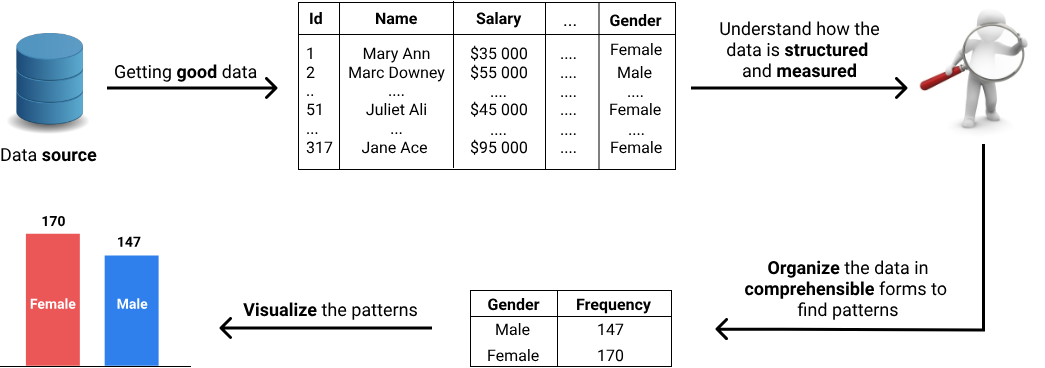

Frequency tables, however, are not the only way of bringing data to a comprehensible form.

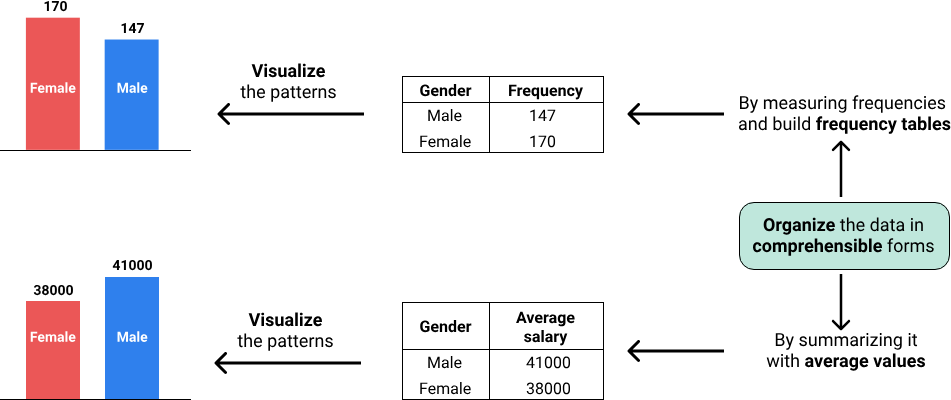

Throughout this course we'll learn to summarize the distribution of a variable with a single value. Depending on the particular characteristics of a distribution, we'll see that we can summarize it using the mean, the weighted mean, the median, or the mode.

We'll also learn to measure the variability in a distribution. If we have a distribution A with the values [3, 3, 3, 3], and a distribution B with [30, 1, 15, 43], we can clearly see that there's much more variability (diversity) in B. We'll learn to quantify variability using measures like variance and standard deviation.

Once we understand the measures of variability, we can then learn how to locate a value in a distribution, and determine how it compares to other values. For instance, when we analyze salaries, we might want to find out whether a salary of $75000 is common or extreme inside a company. We'll learn to answer this question with precision using a z-score.

In this first lesson, we'll have a detailed discussion about the mean. We already learned briefly about the mean in the previous courses of the data science path, but here we discuss the concept again to give the explanations much more depth.

## The Mean

Let's say we want to summarize the distribution below with a single value that is representative of the distribution as a whole.

[
0
,
1
,
4
,
7
,
8
,
10
]

Intuitively, we need to take into account equally every single value in the distribution if we want to find a good summary value that's representative of the entire distribution. We could try to sum all the values in the distribution, and then divide the total by the number of values we added — this way we'll manage to take into account equally every value in the distribution:

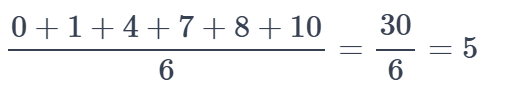

When we compute the summary value of a distribution in this way, we call the value the arithmetic mean, or the mean. For our distribution above, the mean is 5.

We have good reasons to consider 5 a representative value for the distribution above. First, notice that 5 is right at the center of the distribution's range, which is 0 - 10 (0 is the minimum value in the distribution, and 10 is the maximum value):

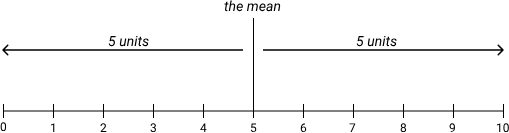

Also, each value is fairly close to the mean. The nearest value to the mean is 4, which is just 1 unit away from the mean, while the farthest values are 0 and 10, located 5 units away from the mean.

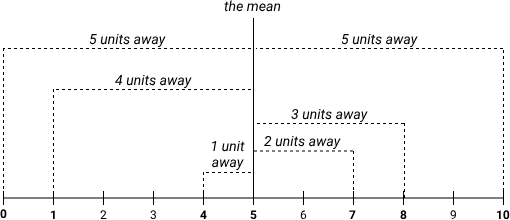

Although the distance for each individual value varies, the sum of the distances of the values that are below the mean is equal to the sum of the distances of the values that are above the mean:

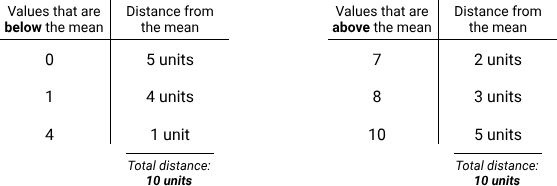

## The Mean as a Balance Point

In the last exercise, we observed from the distribution [0, 2, 3, 3, 3, 4, 13] that the mean 4 is not in the center of the 0 - 13 range interval:

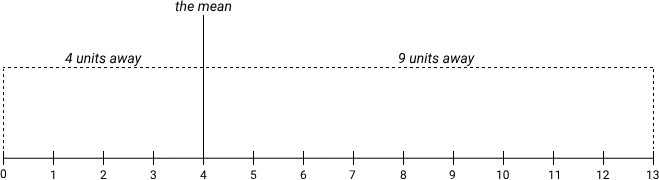

As a consequence, we should avoid thinking of the mean as being the center of a distribution's range. In some cases, the mean will be equivalent to the center of the distribution's range, but we've just seen that this doesn't hold true for all distributions.

We should think of the mean as being the value located at that particular point in the distribution where the total distance of the values below the mean is the same as the total distance of the values that are above the mean. In our last exercise, we saw that this holds true for the distribution [0, 2, 3, 3, 3, 4, 13].

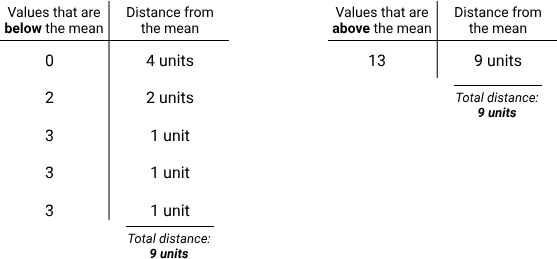

In fact, this is true for the distribution of any variable measured on an interval or ratio scale.

To give students a better intuition for this property of the mean, it's common in the literature to describe the mean as the balance point of a lever.

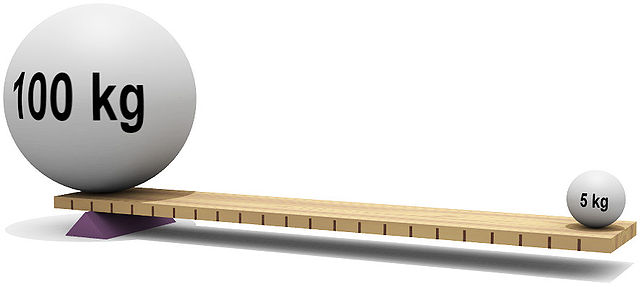

If the total distances above and below the mean were equivalent to the forces exerted by the weights on the rod of the lever, then there would be the same amount of force exerted on each side of the mean. This will make the rod stay in perfect equilibrium:

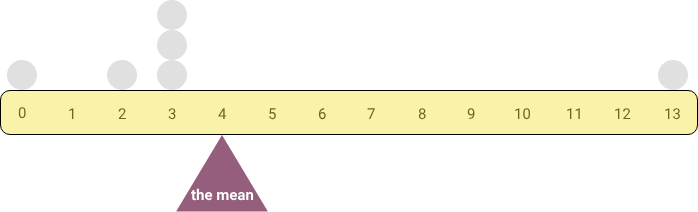

Now that we've seen that the total distances below the mean equal the total distances above the mean, we'll check this rule by measuring the distances for 5000 different distributions in the exercise below.

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
import numpy as np


equal_distances = 0

for i in range(5000):
    np.random.seed(i)
    distribution = np.random.randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    above = []
    below = []
    for value in distribution:
        if value == mean:
            continue # continue with the next iteration because the distance is 0
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
    
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    if (sum_above == sum_below):
        equal_distances += 1

equal_distances

5000

## Defining the Mean Algebraically

A very useful property of the mean is that it can be defined algebraically in a simple way. This is how we can define the mean for any population of 
N
 values (
N
 is the number of values in the population):

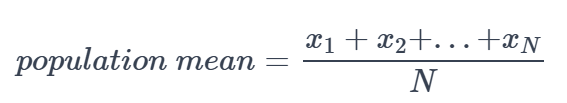

By convention, the mean of a population is denoted with the Greek letter 
μ
 (pronounced "mew"). So we rewrite the formula above:

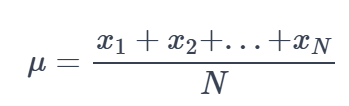

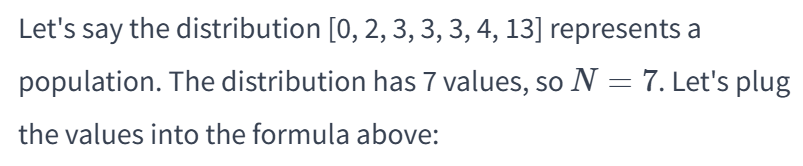

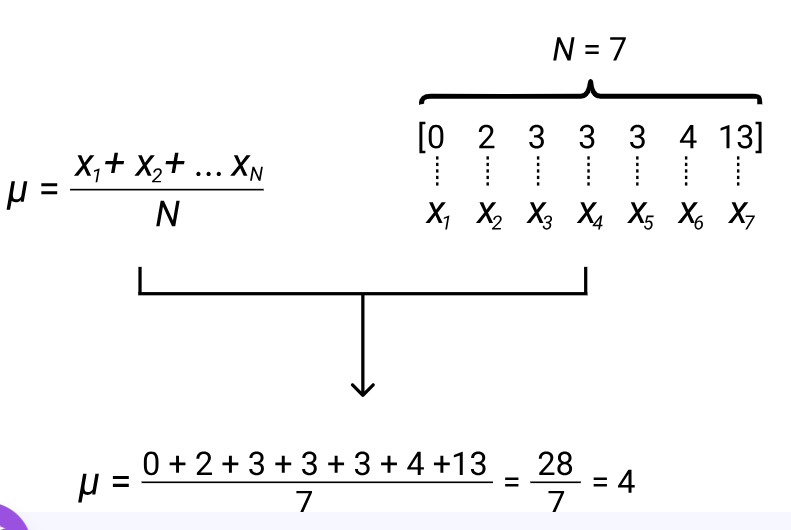

Above, we computed the mean for a population. When we compute the mean for a sample, we need to use a slightly different notation to indicate that we're computing the mean for a sample and not for a population. Instead of 
μ
, we denote the sample mean using 
¯
x
 (pronounced "x-bar"), and we use 
n
 instead of 
N
 to denote the number of values in the sample. This is how we could define the sample mean algebraically:

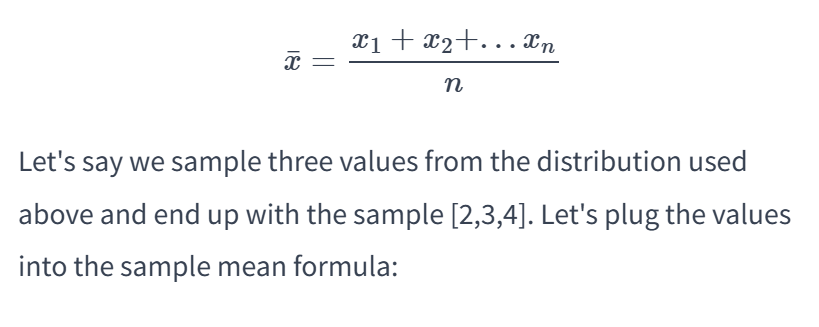

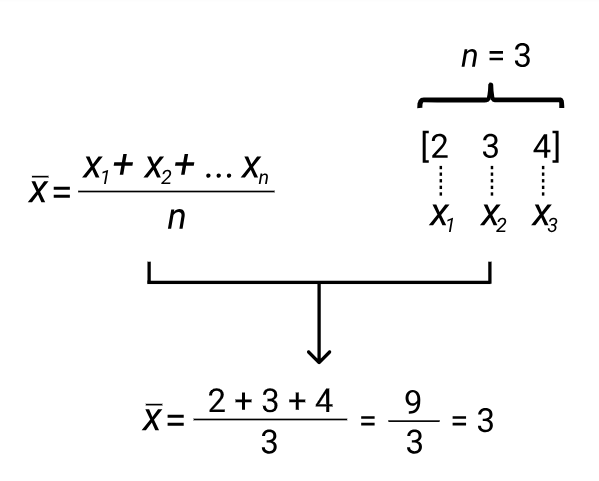

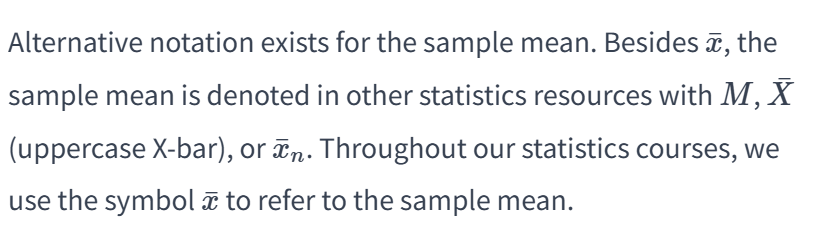

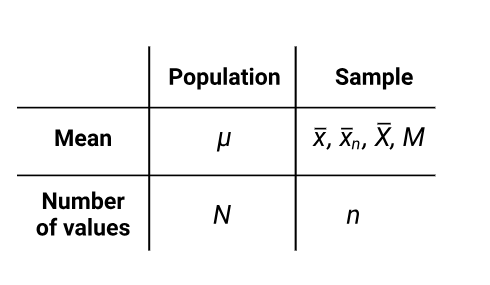

## An Alternative Definition

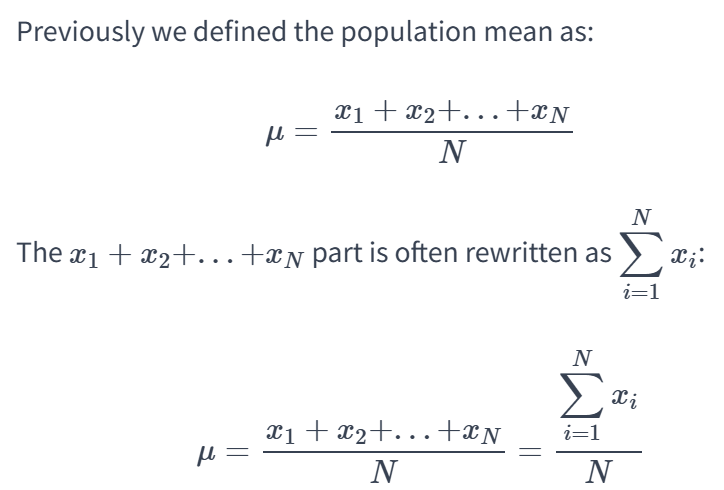

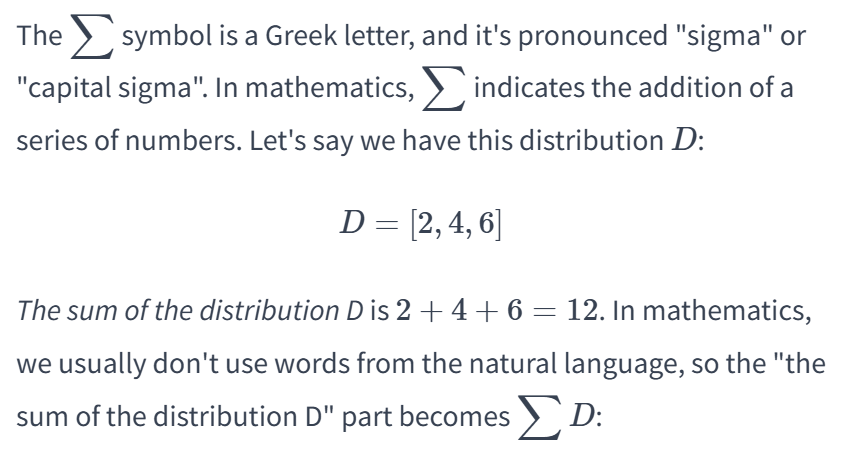

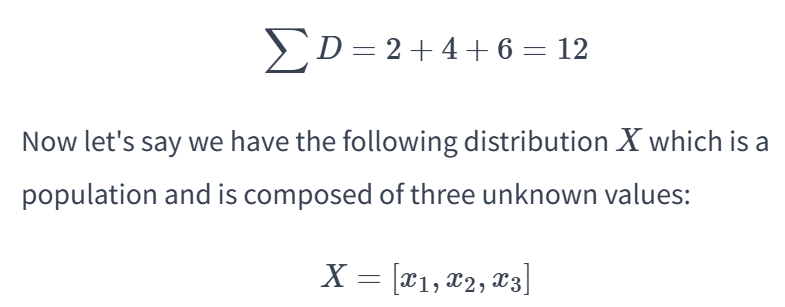

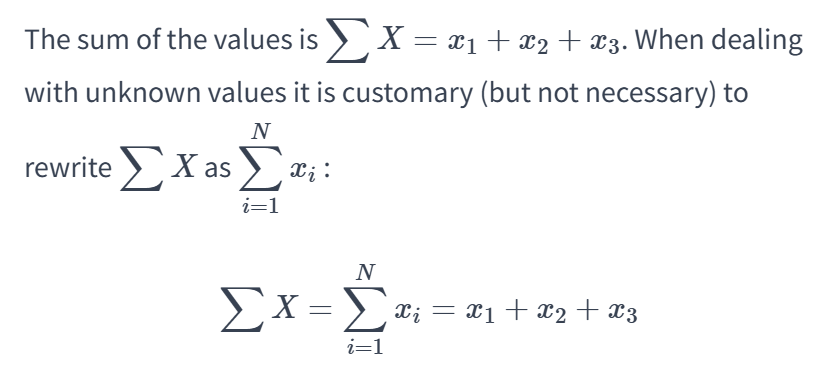

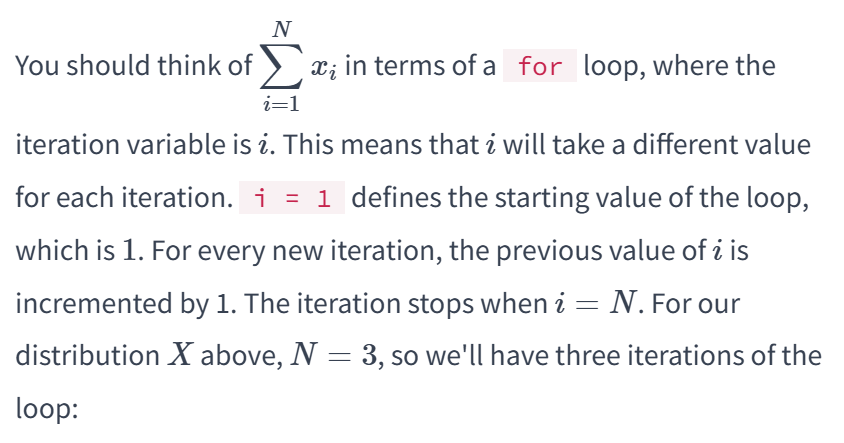

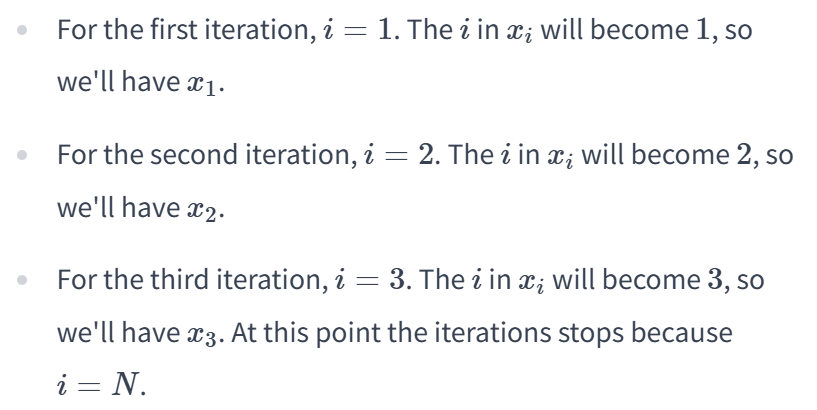

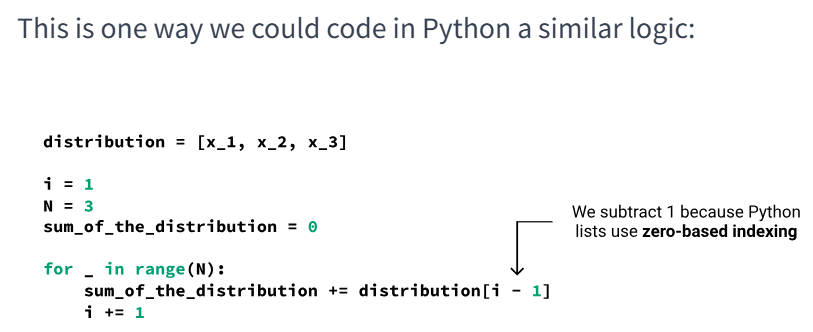

While this is merely notation, it's important to understand it because we'll use it repeatedly as we move forward, and it'll also help you understand other statistics resources. To sum up, these are the ways we can define the population mean algebraically:

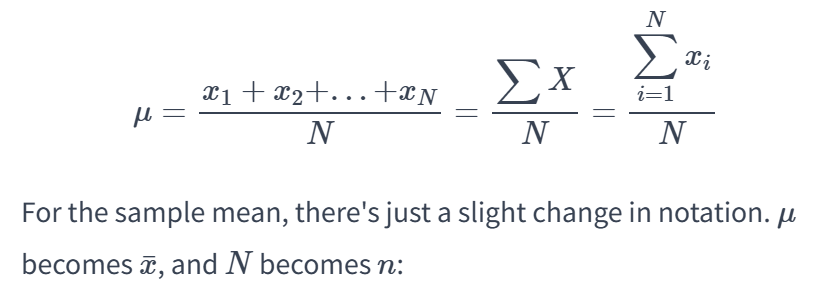

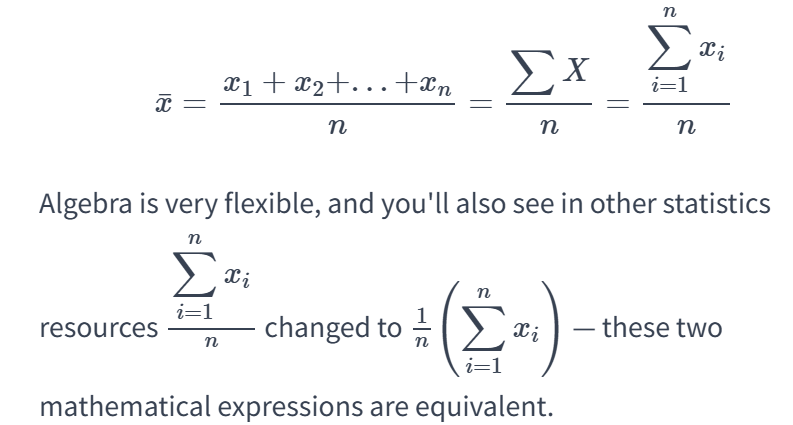

In [3]:
def mean(arr):
    N = len(arr)
    i = 1
    tot = 0
    for _ in range(N):
        tot += arr[i - 1]
        i += 1
    return tot / N
        
        
    

## Introducing the Data

So far we've discussed a few theoretical aspects about the mean and used a few simple distributions (like [2, 4, 6]) to make the explanations easier to grasp. At this point, we introduce a real-world data set to discuss the mean in the context of large and real-world distributions.

We'll be working with a data set that describes characteristics of houses sold between 2006 and 2010 in the city of Ames (located in the American state of Iowa). There are 2930 rows in the data set, and each row describes a house. For each house there are 82 characteristics described, which means there are 82 columns in the data set. Here's a brief extract from the data set:

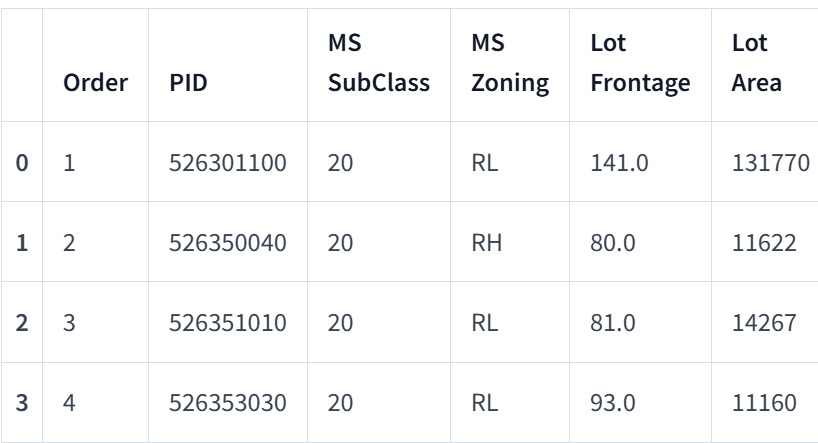

The data set was collected by professor Dean DeCock. He described in great detail the data collection process [in this paper](https://doi.org/10.1080/10691898.2011.11889627) published in the Journal of Statistics Education. The documentation of the data set can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
houses = pd.read_table('../../Datasets/AmesHousing_1.txt')
houses.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0    131770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [6]:
houses['Sale Type'].value_counts()

Sale Type
WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: count, dtype: int64

## Mean House Prices

Let's say we're interested in analyzing the distribution of the sale prices of the houses. We can get a good overview about this distribution using the Series.describe() method:

In [7]:
houses['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can see that the distribution has a large range: the minimum sale price is $12789 while the maximum is $755000. Among this diversity of prices, we can see that the mean (or the "balance point") of this distribution is approximately $180796. The mean gives us a sense about the typical sale price in this distribution of 2930 prices.

If we want to compute only the mean, it's more convenient to use the [Series.mean() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html):

In [8]:
houses['SalePrice'].mean()

180796.0600682594

In [9]:
function_mean = mean(houses['SalePrice'])
pandas_mean = houses['SalePrice'].mean()

means_are_equal = function_mean == pandas_mean
means_are_equal

True

## Estimating the Population Mean

In practice, we almost always work with samples. But most of the time we're not interested in answering questions about samples — we want to answer questions about populations. A lot of the questions we want to answer in practice can be reduced to finding the mean of a population:

- What is the mean amount of money our customers spent last year on our website?
- What is the mean amount of time customers spent daily the first week after the promotion we ran? How does that compare to the mean amount of time spent daily in the week before the promotion?
- What is the mean sale price of a house in Ames, Iowa for the period 2006-2010?

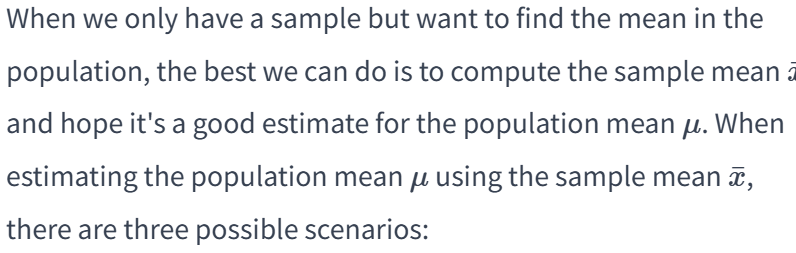

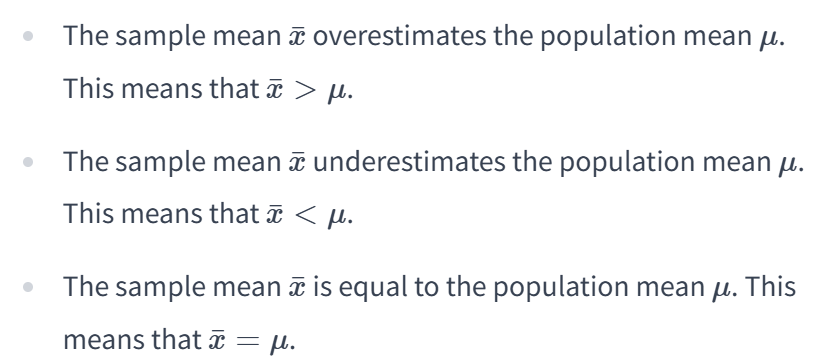

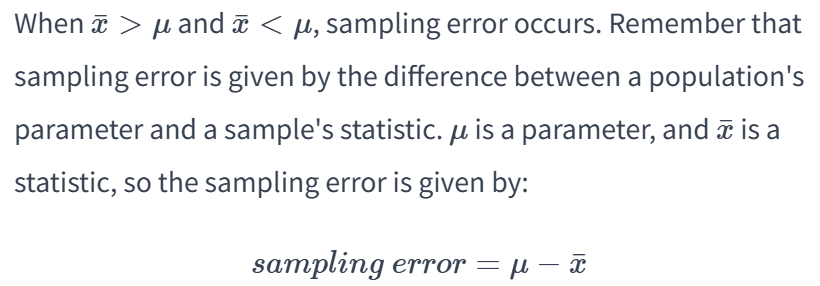

Our aim is to reduce the sampling error. Two important factors that influence the sampling error are:

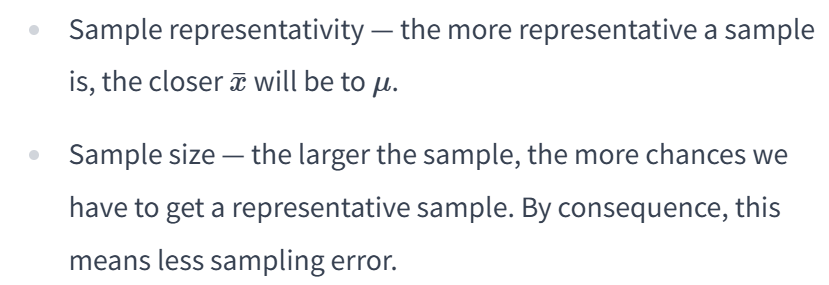

This emphasizes once more the importance of the sampling process, where we should try our best to get a representative sample.

In the exercise below, we'll try to visualize on a scatter plot how the sampling error changes as we increase the sample size. Just to prove a point, we'll assume that our data set describes all the houses sold in Ames, Iowa between 2006 and 2010.

In [10]:
mean = houses['SalePrice'].mean()
size = 5
errors = []
for i in range(101):
    sample = houses.sample(size, random_state=i)
    sample_mean = sample['SalePrice'].mean()
    sampling_error = mean - sample_mean
    errors.append(sampling_error)
    size += 29

In [11]:
len(errors)
np.arange(5, 2914, 29)

array([   5,   34,   63,   92,  121,  150,  179,  208,  237,  266,  295,
        324,  353,  382,  411,  440,  469,  498,  527,  556,  585,  614,
        643,  672,  701,  730,  759,  788,  817,  846,  875,  904,  933,
        962,  991, 1020, 1049, 1078, 1107, 1136, 1165, 1194, 1223, 1252,
       1281, 1310, 1339, 1368, 1397, 1426, 1455, 1484, 1513, 1542, 1571,
       1600, 1629, 1658, 1687, 1716, 1745, 1774, 1803, 1832, 1861, 1890,
       1919, 1948, 1977, 2006, 2035, 2064, 2093, 2122, 2151, 2180, 2209,
       2238, 2267, 2296, 2325, 2354, 2383, 2412, 2441, 2470, 2499, 2528,
       2557, 2586, 2615, 2644, 2673, 2702, 2731, 2760, 2789, 2818, 2847,
       2876, 2905])

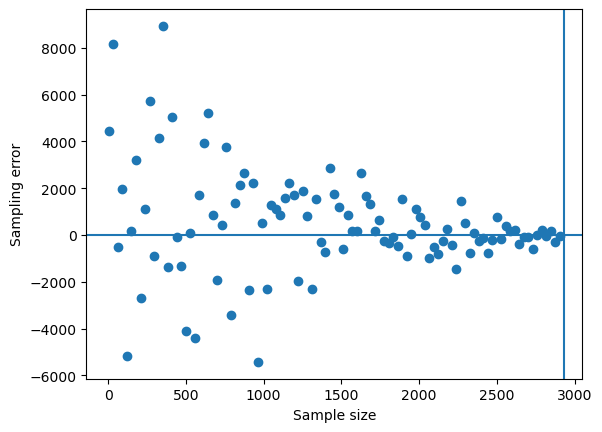

In [12]:
plt.scatter(x=np.arange(5, 2914, 29), y=errors)
plt.axhline(y=0)
plt.axvline(x=2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')
plt.show()

## Estimates from Low-Sized Samples

We've seen in the previous exercise that the general tendency for the sampling error is to decrease as the sample size increases. This tendency, however, has exceptions. For instance, there are cases where small sample sizes (100-500 sample points) gave us better estimates for the population mean 
μ
 than large sample sizes (2500 sample points or more) did.

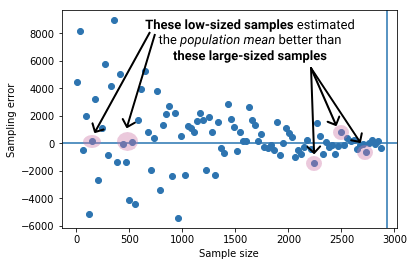

For any given sample size, we can have many combinations of values. For instance, for a sample size of 3, we can have many possible combinations of sale prices: [220000, 143000, 281000], [123600, 209500, 202665], [287000, 142500, 440000], etc. Most of the samples of size 3 will give a good estimate of the population mean 
μ
. To prove this point, in the code below we will:

- Measure the mean for 10000 samples of size 3.
- Use a histogram to visualize the distribution of the sample means.
- Draw a vertical line corresponding to the population mean 
μ


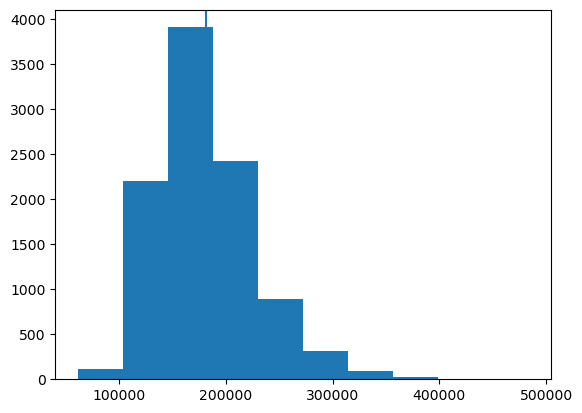

In [13]:
means = []
for i in range(10000):
    sample = houses['SalePrice'].sample(3, random_state=i)
    means.append(sample.mean())

plt.hist(means)
plt.axvline(houses['SalePrice'].mean())

We can see that most sample means cluster around the population mean. This means that when we take a sample of size 3 and compute 
¯
x
, we have fairly good chances to get a good estimate for the population mean 
μ
. This explains what we've seen in the scatter plot above, where we got good estimates from low-sized samples.

It's also worth noting that the mean of the 10000 samples' means we computed is very close to the population's mean 
μ
:

In [14]:
print(sum(means) / len(means))

180824.7253000002


In [15]:
print(houses['SalePrice'].mean())

180796.0600682594


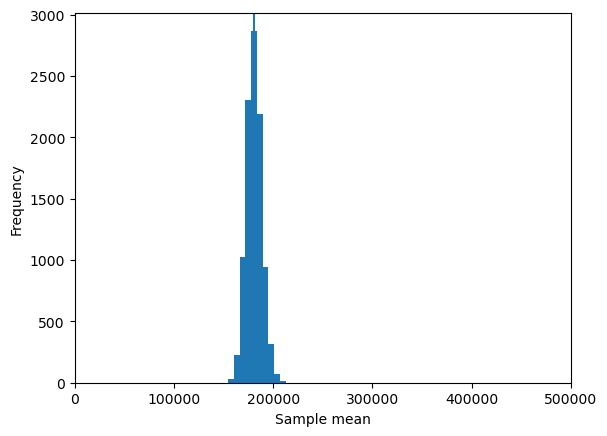

In [16]:
means = []
for i in range(10000):
    sample_mean = houses['SalePrice'].sample(100, random_state=i).mean()
    means.append(sample_mean)

plt.hist(means)
plt.axvline(houses['SalePrice'].mean())
plt.xlabel('Sample mean')
plt.ylabel('Frequency')
plt.xlim(0, 500000)
plt.show()

## Variability Around the Population Mean

In the previous exercise, we observed that with a sample size of 100 the sample means vary much less around the population mean than in the case of a sample size of 3.

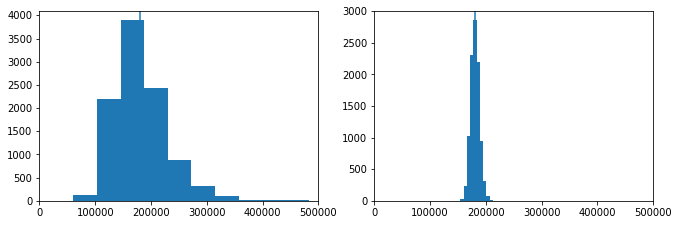

Generally, as we increase the sample size, there will be less and less variability around the population mean. If there's less variability, there are less chances to get a poor estimate for the population mean — the worst sample means we can get are fairly close to the population mean, which is good.

We can clearly see that sample means vary less and less and less as we increase the sample size:

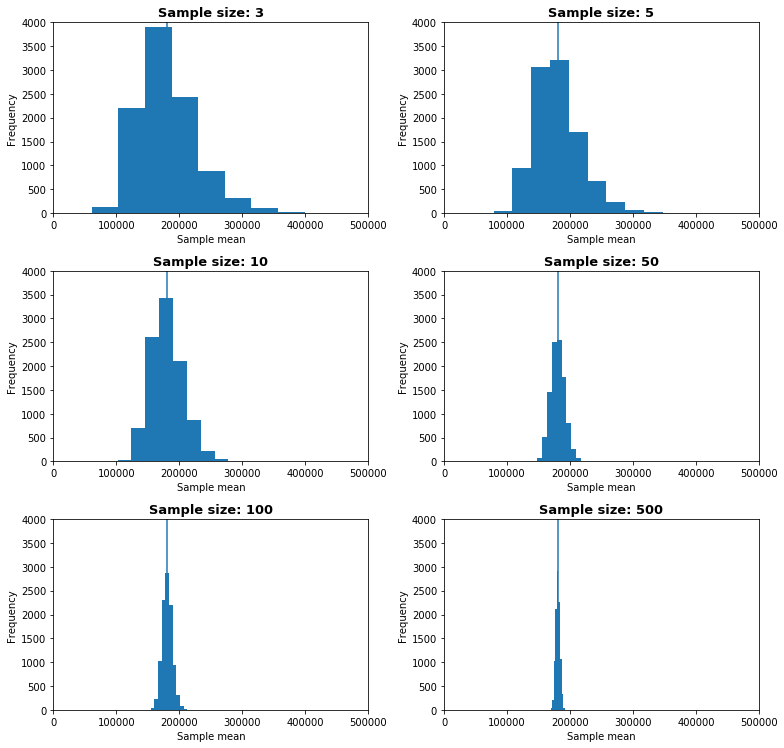

## The Sample Mean as an Unbiased Estimator

If we took all the possible samples for a given sample size, we'd observe that the mean of the sample means will be equal to the population mean. Consider this small population of values:

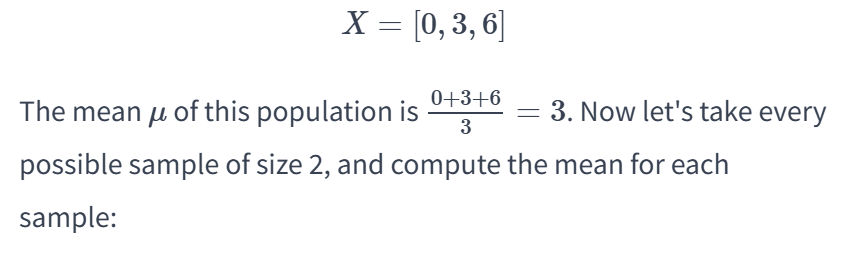

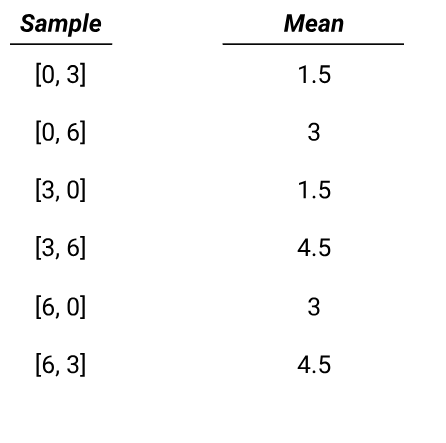

Now let's find the mean of the sample means. We add up the means we got for each of the six samples above and divide by the number of samples:

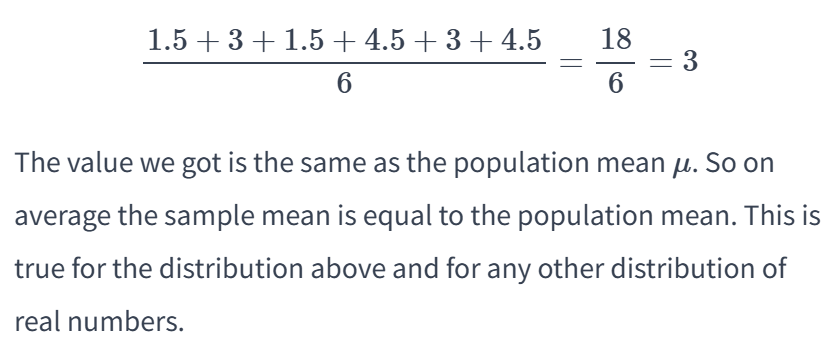

When a statistic is on average equal to the parameter it estimates, we call that statistic an unbiased estimator. In our case, the sample mean 
¯
x
 is an unbiased estimator for the population mean 
μ
.

This also holds true if we sample with replacement. When we do sampling with replacement, we sample one value, and then we put it back in the population, which means we can sample that value again. For instance, if we want a sample of size 2 from the population above, and we sample with replacement, this could happen:

- We extract one value randomly and get a 3.
- Because we sample with replacement, we put the value back in the population.
- We extract one more value and get a 3 again. We end up with this sample: 
[
3
,
3
]
.

Below we can see the samples of size 2 we can get when we sample with replacement from the population above. We also show the mean for each sample:

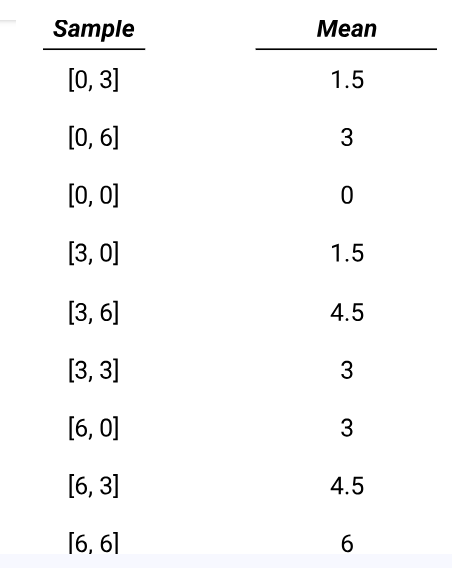

The mean of the sample means amounts to 3 again, and confirms that 
¯
x
 is an unbiased estimator for the population mean 
μ
 when we sample with replacement:

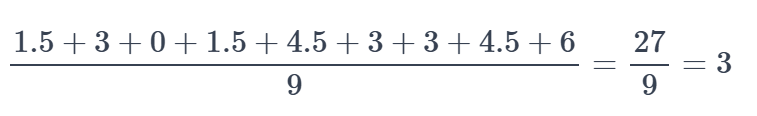

In [17]:
from itertools import permutations

In [18]:
pop = [3, 7, 2]
means = []
for i in permutations(pop, 2):
    means.append(sum(i)/2)

pop_mean = sum(pop) / len(pop)
mean = sum(means) / len(means)

unbiased = mean == pop_mean
unbiased

True

## Next steps

In this lesson, we explored in more depth the mean:

- We saw that the mean can be intuitively understood as the "balance point" of a distribution.
- We learned to distinguish conceptually between the sample and the population mean, and we saw that we use different notation for each case.
- We demonstrated with a few examples that the sample mean 
¯
x
 is an unbiased estimator for the population mean 
μ
.

In the next lesson, we'll explore a few edge cases where it's either impossible to compute the mean, or it's possible but not theoretically sound.

## The Weighted Mean and the Median

In the previous lesson, we learned about the mean and worked with a data set on house sale prices:

In one of the steps, we computed the mean sale price and found it to be approximately $180796:

In [19]:
print(houses['SalePrice'].mean())

180796.0600682594


Let's say that instead of the above data set, we only have the following summary table based on it:

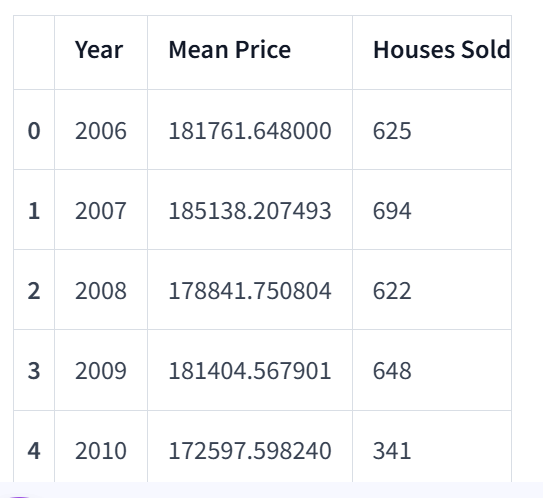

Once again, our task is to find the mean house sale price across all years. Intuitively, we just need to find the mean of the Mean Price column. Let's do that and see if the result matches what we got first from computing the mean of the SalePrice column in the original data set.

We've already read in the table above and stored it in a variable named houses_per_year. We've also read in the original data set in a variable named houses.

## Different Weights

Rather counterintuitively, we noticed in the previous exercise that the mean of the Mean Price column is not equal to that of the SalePrice column. The root of the problem is related to the fact that we have different number of houses sold each year (notice the Houses Sold column):

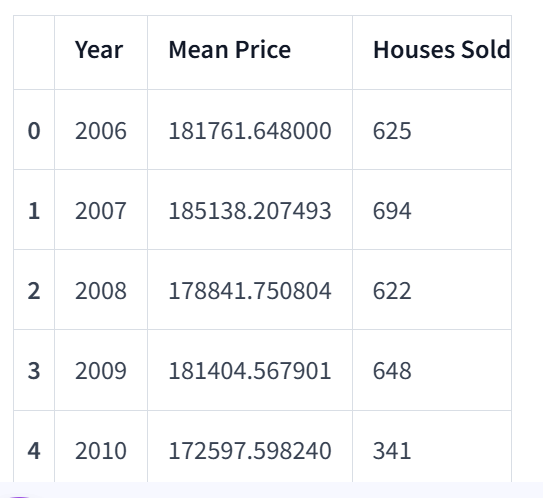

Because each year has a different number of sold houses, the mean of sale prices for each individual year weighs differently in the overall mean. But when we computed the mean of the Mean Price column, we gave each year the same weight because we added all the five mean prices and then divided by 5.

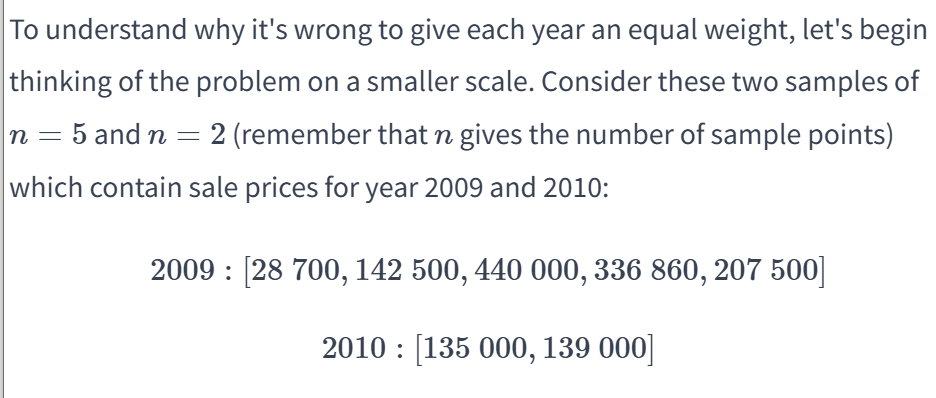

To find the mean across years 2009 and 2010, we can add the five prices for 2009 with the two prices for 2010, and then divide by 7 (because we have 7 prices in total):

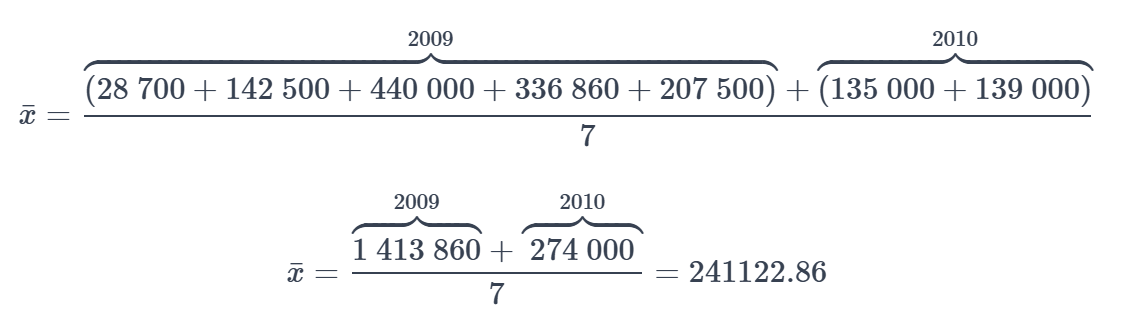

Notice in the numerator that year 2009 has a greater contribution (
1413860
) than year 2010 (
274000
). If we took instead the mean for each year individually, add the two means and divide their sum by 2, then we'd give each year the same weight. This is wrong, and it leads to a wrong result for the overall mean:

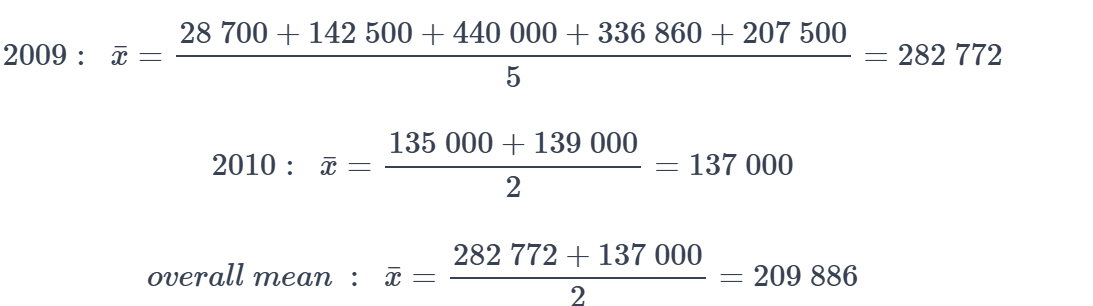

This is the same mistake we made in the previous exercise: we gave each year the same weight. To compute the correct overall mean, we need to:

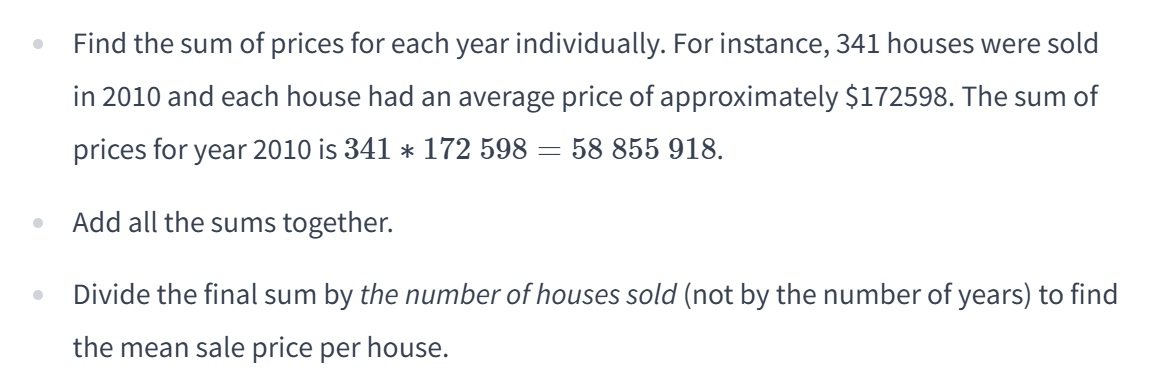

## The Weighted Mean

When we take into account the different weights and compute the mean like we did in the previous exercise, we call that mean the weighted mean. Just as the arithmetic mean we learned about in the previous lesson, the weighted mean can be easily defined algebraically.

In the previous exercise, we compute the weighted mean for this distribution of sample means:

[
181761.648
,
185138.2074928
,
178841.75080386
,
181404.56790123
,
172597.59824047
]

We multiplied each value by the number of houses sold in that year to take into account the different weights, then we summed up the products and divided by the total number of houses. This is the distribution of weights we used:

[
625
,
694
,
622
,
648
,
341
]

Now imagine that instead of the actual values, we have six unknown prices, which we'll abbreviate with 
x
, and six unknown corresponding weights which we'll abbreviate with 
w
:

[
x
1
,
x
2
,
x
3
,
x
4
,
x
5
,
x
6
]

[
w
1
,
w
2
,
w
3
,
w
4
,
w
5
,
w
6
]

To find the weighted mean, we need to:

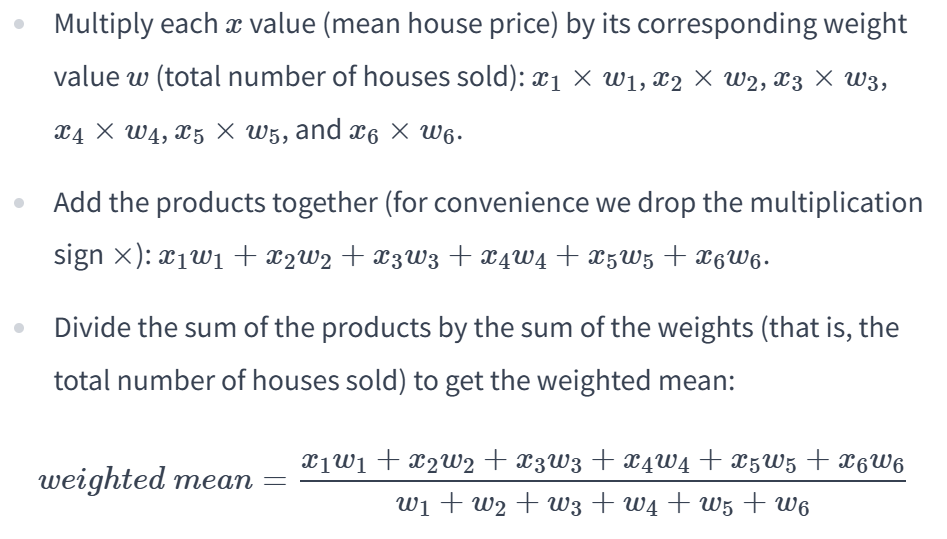

The equation above only works if we have six mean values and six weights. We can easily extend the equation, however, to account for any number of mean values and weights:

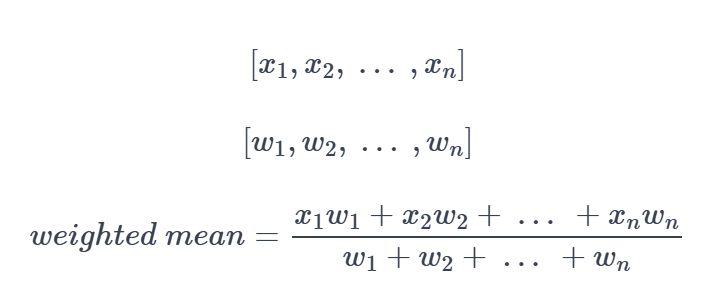

This is how the formula above would work if we had three mean values and three weights:

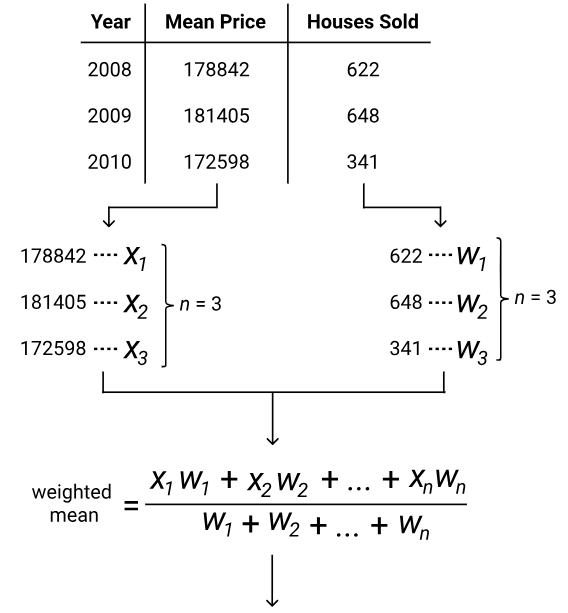

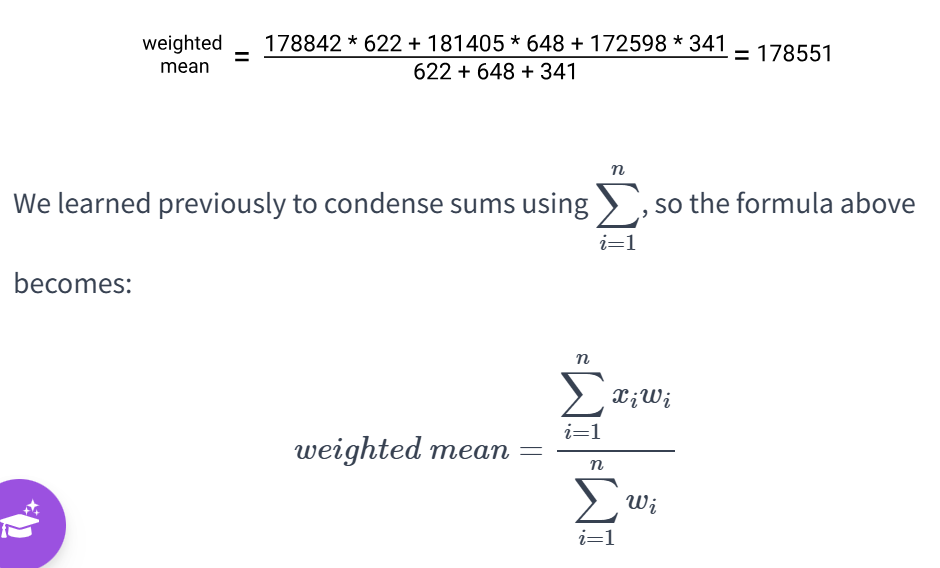

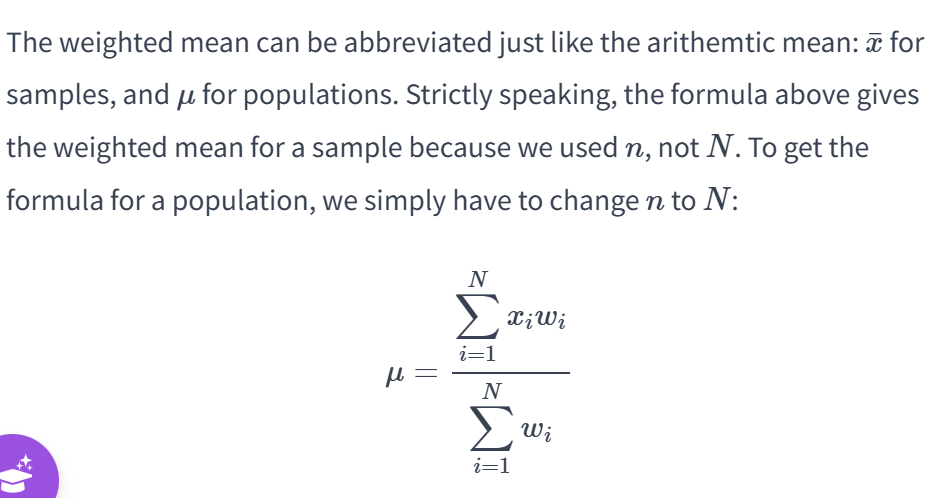

## The Median for Open-ended Distributions

While learning about the weighted mean we saw that there are distributions where it's possible to compute the mean, although that wouldn't be correct. There are distributions, however, where it's impossible to compute the mean. Consider for instance the frequency distribution of the TotRms AbvGrd variable, which describes the number of rooms above ground:

In [20]:
print(houses['TotRms AbvGrd'].value_counts())

TotRms AbvGrd
6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: count, dtype: int64


The lowest boundary of the distribution is well-defined — the lowest value is 2 and no value in the distribution can be lower than that. But the upper boundary is not defined as precisely — the highest value is "10 or more" which means that houses can actually have 10, 11, 15, or even more rooms. The upper boundary ("10 or more") is thus open, and for this reason we say that the TotRms AbvGrd variable has an open-ended distribution.

It's still reasonable to want to find an average value (a single representative value) for this distribution, but "10 or more" is not numerical, which makes it impossible to compute the mean.

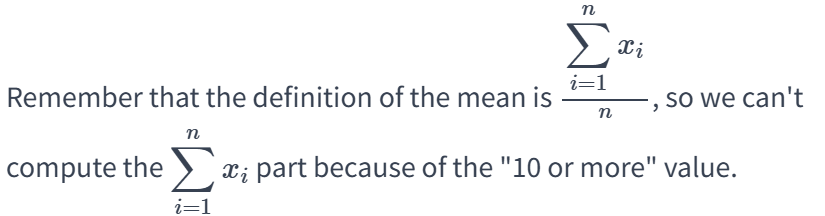

A common workaround is to sort all the values in the distribution in an ascending order and then select the middle value as the most representative value of the distribution. Consider this sample of 5 values from the TomRms AbvGrd column:

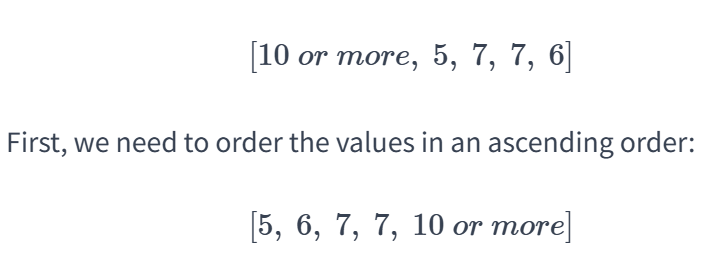

This distribution has five values and the middle one is the third one because it divides the distribution in two halves of equal length. The third value is 
7
, and the two resulting halves are 
[
5
,
6
]
 and 
[
7
,
10
 
o
r
 
m
o
r
e
]
. We call this middle value the median, so for this case the median is 7.

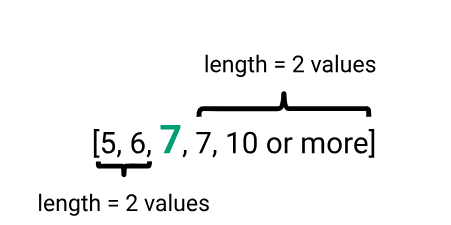

Let's practice computing medians for a few distributions before finding the median of the TotRms AbvGrd above.

## Distributions with Even Number of Values

When a distribution has an even number of values, it's not clear which is the middle one. Consider this sorted distribution with 6 values:

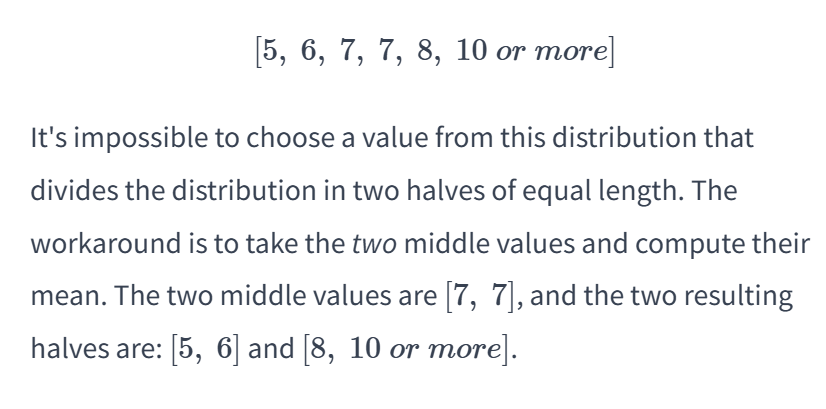

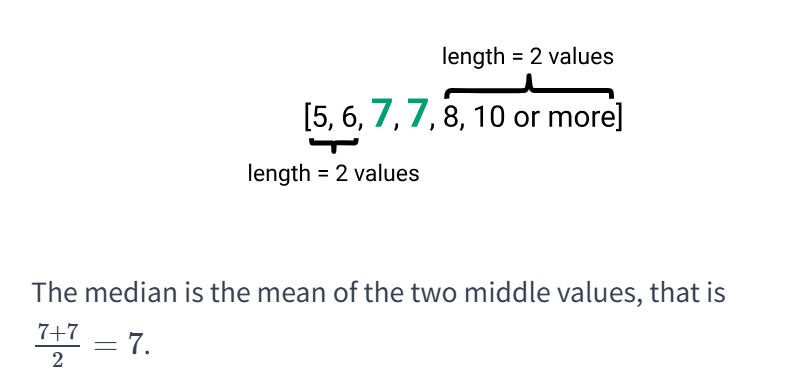

This value of 7 is the average value of the distribution above. In statistics, the term "average" refers to the most representative value of a distribution. Although it's common to use "average" and "mean" interchangeably, "average" is not restricted to refer only to the mean. Depending on the context, it can also refer to the median or the mode.

For the mean, we learned that there are special symbols like 
¯
x
 or 
μ
. For the median, there's no widely accepted standard notation — most commonly, both the sample and the population median are simply denoted with the word 
m
e
d
i
a
n
.

Unlike the mean, the median doesn't have a neat way to be defined algebraically. This is because sorting a distribution in an ascending order and then choosing a middle value or two doesn't involve any arithmetic. The different treatment for odd and even-numbered distributions also poses some theoretical challenges for constructing a single definition.

In [21]:
houses['TotRms AbvGrd'].copy().str.replace('10 or more', '10').astype(int).median()

6.0

In [22]:
# Sort the values
rooms = houses['TotRms AbvGrd'].copy()
rooms = rooms.replace({'10 or more': 10})
rooms = rooms.astype(int)
rooms_sorted = rooms.sort_values()

# Find the median
middle_indices = [int((len(rooms_sorted) / 2) - 1),
                  int((len(rooms_sorted) / 2))
                 ] # len - 1 and len because Series use 0-indexing 
middle_values = rooms_sorted.iloc[middle_indices] # make sure you don't use loc[]
median = middle_values.mean()

In [23]:
median

6.0

## The Median as a Resistant Statistic

When we compute the mean, we account equally for each value in the distribution — we sum up all the values in the distribution and then divide the total by the number of values we added. When we compute the median, however, we don't consider equally each value in the distribution. In fact, we only consider the middle value (or the middle two values).

This property makes the median more resistant to changes in the data compared to the mean. Let's consider this simple distribution:

[
2
,
3
,
5
,
5
,
10
]
 

Both the median and the mean of this distribution are 5. Let's change the last value in the distribution from 10 to 1000:

[
2
,
3
,
5
,
5
,
1000
]

The median is still 5, but the mean is now 203. This is because the mean takes into account every value in the distribution, while the median considers only the middle value. Because the median is so resistant to changes in the data, it's classified as a resistant or robust statistic.

This property makes the median ideal for finding reasonable averages for distributions containing outliers. Consider this distribution of annual salaries for five people in a company:

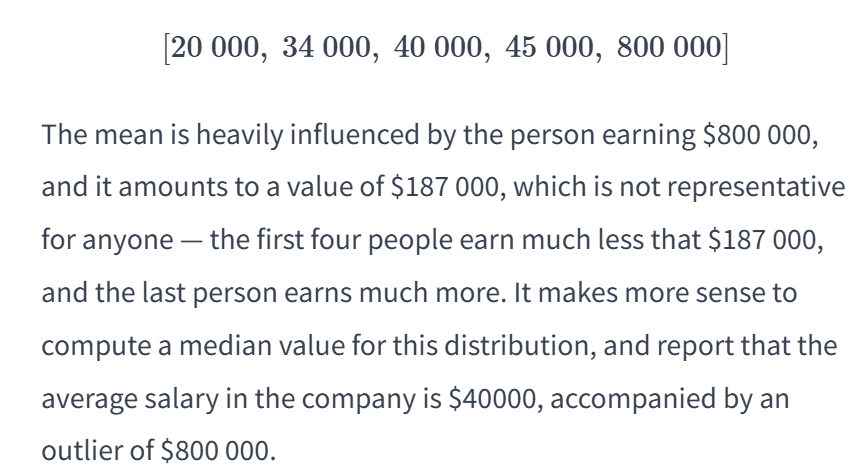

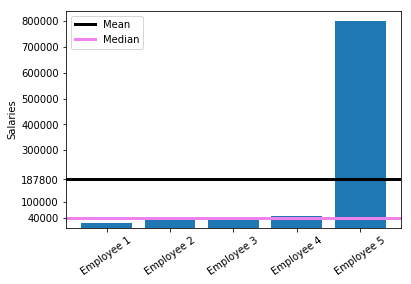


## The Median for Ordinal Scales

Data points belonging to ordinal variables are often coded using numbers. Consider the frequency distribution of the Overall Cond variable, which rates the overall condition of a house:

In [24]:
print(houses['Overall Cond'].value_counts().sort_index())

Overall Cond
1       7
2      10
3      50
4     101
5    1654
6     533
7     390
8     144
9      41
Name: count, dtype: int64


In the [documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt), we can find that each numerical value corresponds to a specific quality level:

Code	Quality
1	Very poor
2	Poor
3	Fair
4	Below average
5	Average
6	Above average
7	Good
8	Very good
9	Excellent
10	Very excellent

Because words like "fair" or "average" are coded with numbers, it becomes mathematically possible to compute the mean. But whether or not it's theoretically sound to compute the mean for ordinal variables is contentious. Below we explore one argument against computing the mean, and in the next screen we'll explore an argument that supports the idea of using the mean.

Remember from the previous course that if two data points are measured on an ordinal scale and there's a difference between them, we can tell the direction of the difference, but we don't know the size of the difference.

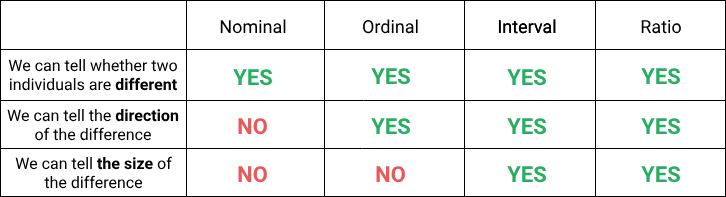


Suppose the house's overall condition is rated with an 8 (Very good), and another house gets a 4 (Below average). In that case, we can't say that the former's conditions are twice as better as the latter. The most we can say is that the house which got an 8 has better conditions (we can't quantify how much better — it could be twice as better, three times as better, 1.5 times as better, we simply don't know).

This should be more clear if we consider the fact that the numbers used to encode the quality levels ("Poor", "Fair", "Good", etc.) are chosen arbitrarily. Instead of numbers from 1 to 10, we could have numbers from 30 to 40, or from 50 to 70 in steps of 2, or from 0 to 9:

Code	Quality
0	Very poor
1	Poor
2	Fair
3	Below average
4	Average
5	Above average
6	Good
7	Very good
8	Excellent
9	Very excellent

Inside the framework of a 0-9 system, a "Very good" label would be encoded as a 7, and a "Below average" as a 3. If we took ratios, we'd reach different conclusions for different encoding systems:

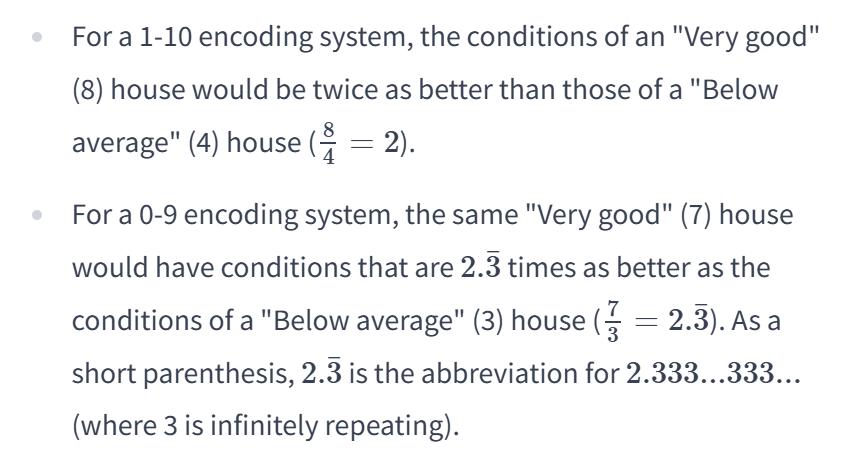

It can be argued thus that the numerical values of an ordinal variable are not subject to meaningful arithmetical operations. But computing the mean involves meaningful arithmetical operations, so it's not theoretically sound to use the mean for ordinal variables.

Because the median doesn't involve arithmetical operations, it's considered a better alternative to the mean. This doesn't fully apply, however, to even-numbered distributions, where we need to take the mean of the middle two values to find the median. This poses some theoretical problems, and we'll see in the next lesson that the mode might be a better choice in this case as a measure of average.

## Sensitivity to Changes

Although it can be argued that it's theoretically unsound to compute the mean for ordinal variables, in the last exercise we found the mean more informative and representative than the median. The truth is that in practice many people get past the theoretical hurdles and use the mean nonetheless because in many cases it's much richer in information than the median.

Let's consider a situation where the mean is arguably a much better choice to measure the average of an ordinal variable. Let's say we're working for an online real estate company which allows customers to buy, sell, and rent houses. The speed on our website is important for all of our customers, and we want to measure how the customers perceive the speed on the website.

We sample randomly 10 customers and have them assess the following sentence: "The website is very fast, usually a new page loads in less than a second". The customers can choose between the following answers, which we plan to code under the hood with numbers between 1 and 5:

Code	Answer
1	Strongly disagree
2	Disagree
3	Neither agree nor disagree
4	Agree
5	Strongly agree

he survey yielded the distribution below, whose mean and median have both a value of 2:

[
1
,
1
,
1
,
2
,
2
,
2
,
2
,
3
,
3
,
3
]

After being presented with the results, the engineering team implemented a few changes meant to improve speed, and now we repeat the survey on another random sample of 10 customers and get these results:

[
1
,
2
,
2
,
2
,
2
,
2
,
4
,
5
,
5
,
5
]

The median is still 2, and it suggests that nothing changed. The mean, however, went up to 3, suggesting that the changes our engineers made have had a positive effect. Unlike the median, the mean is sensitive to small changes in the data, and this property is what makes it more useful in this case.

It should be clear by now that whether we should use the mean for ordinal data is contentious. In practice, you should be flexible and make your choice on a case by case basis. Also, you are not constrained to choose one metric or the other — you can choose both the mean and median to describe a distribution.

## Next steps
In this lesson, we learned about the weighted mean and the median. We saw that for some distributions computing the mean is possible but incorrect. As an alternative, we learned about the weighted mean.

We saw that it's impossible to compute the mean for open-ended distributions and introduced the median as an alternative. For ordinal data, if we encode the attributes with numbers it becomes possible to compute the mean, but this is contentious and raises theoretical issues.

In the next lesson, we continue the discussion about finding averages for ordinal data and also learn new things, like finding the average value for nominal variables.

## The Mode

We learned that the mean takes into account each value in the distribution, and we saw that it's fairly easy to define the mean algebraically. These two properties make the mean far superior to the median. The median comes in handy, however, when it's not possible or appropriate to compute the mean.

In this lesson we'll explore a couple of cases where neither the mean nor the median are suitable for finding an average value, and we'll learn an alternative summary metric.

We'll still be working with the same data set on house sale prices that we used in the last two lessons:

Let's get familiar with a few parts of the data set which we're going to explore in this lesson.

In [25]:
houses['Land Slope'].value_counts()

Land Slope
Gtl    2789
Mod     125
Sev      16
Name: count, dtype: int64

In [26]:
houses['Roof Style'].value_counts()

Roof Style
Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: count, dtype: int64

In [27]:
houses['Kitchen AbvGr'].value_counts()

Kitchen AbvGr
1    2796
2     129
0       3
3       2
Name: count, dtype: int64

## The Mode for Ordinal Variables

In the last exercise, we found that the Land Slope variable is ordinal. You may have also found from your exploration that the values of this variable are represented using words:

In [28]:
print(houses['Land Slope'].unique())

['Gtl' 'Mod' 'Sev']


As you may have already found in the documentation, 'Gtl' means gentle slope, 'Mod' means moderate slope, and 'Sev' stands for 'Severe slope'.

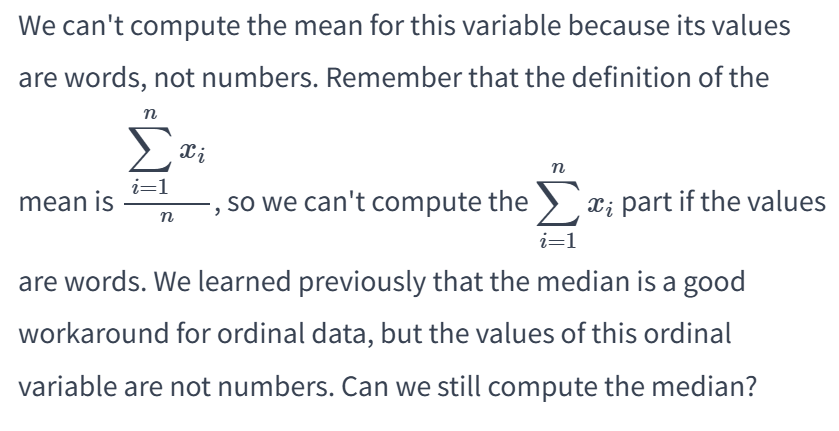

If we sort the values of the Land Slope variable, we can find that the middle two values are ['Gtl', 'Gtl'] (the variable has an even number of values). Although we can't take their mean, it's intuitively clear that the average of two identical values is one of those values, so the median value should be 'Gtl'.

However, if the two middle values were ['Gtl', 'Mod'], then it wouldn't be clear at all what to choose for the median. In cases like this, one workaround for finding an average value is to measure the most frequent value in the distribution. For the Land Slope variable, we can see that the value 'Gtl' has the greatest frequency:

In [29]:
print(houses['Land Slope'].value_counts())

Land Slope
Gtl    2789
Mod     125
Sev      16
Name: count, dtype: int64


We call the most frequent value in the distribution the mode. So the mode of the Land Slope variable is 'Gtl'. In other words, the typical house has a gentle slope. Very importantly, notice that the mode is the most frequent value in the distribution, not the frequency of that value — so the mode is 'Gtl', not 2789.

Just like for the median, there's no standard notation for the mode. It's also worth noting that the mode is not defined algebraically.

In [30]:
def mode(array):
    mydict = {}
    
    for key in array:
        mydict[key] = mydict.get(key, 0) + 1
        
    return max(mydict, key=mydict.get)

mode_function = mode(houses['Land Slope'])
mode_method = houses['Land Slope'].mode()

same = mode_function == mode_method

##  The Mode for Nominal Variables

In the previous screen, we learned that the mode is ideal for ordinal data represented using words. The mode is also a good choice for nominal data. Let's consider the Roof Style variable, which is measured on a nominal scale and describes the roof type of a house:

In [31]:
print(houses['Roof Style'].value_counts())

Roof Style
Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: count, dtype: int64


We obviously can't compute the mean for this variable because the values are words. Even if they were coded as numbers, it'd be completely wrong to compute the mean because in the case of nominal variables the numbers describe qualities, not quantities.

In the previous lesson, we made the case that we could compute the mean for ordinal variables if the values are numbers. This reasoning doesn't extend to nominal variables because they don't describe quantities, like ordinal variables do.

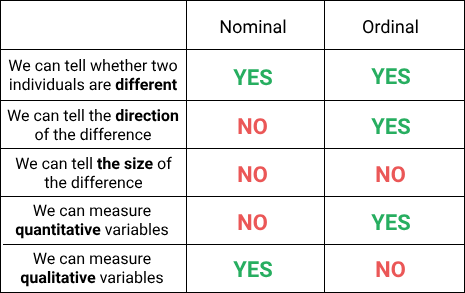

Because the Roof Style variable is nominal, there's also no inherent order of the values in the distribution. This means that we can't sort the values in an ascending or descending order. The first step in computing the median is to sort the values in ascending order, which means we can't compute the median for the Roof Style variable.

In [32]:
# The function we wrote (you can copy-paste yours from the previous screen)
def mode(array):
    counts = {}
    
    for value in array:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    
    return max(counts, key=counts.get), counts
mode, value_counts = mode(houses['Roof Style'])

print(houses['Roof Style'].value_counts())

Roof Style
Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: count, dtype: int64


## The Mode for Discrete Variables

There are some cases where computing the mean and the median is possible and correct, but the mode is preferred nonetheless. This is sometimes the case for discrete variables.



To remind you from the first course, variables measured on interval or ratio scales can also be classified as discrete or continuous. A discrete variable is a type of variable that can only take on certain specific values, usually integers. This means that there are no possible intermediate values between any two adjacent values of the variable. For example, the number of children in a family is a discrete variable because it can only take on whole numbers - you can't have half a child or 2.5 children. Let's consider another instance of the Kitchen AbvGr variable, which describes the number of kitchens in a house:

In [33]:
print(houses['Kitchen AbvGr'].value_counts().sort_index())

Kitchen AbvGr
0       3
1    2796
2     129
3       2
Name: count, dtype: int64


Let's say we need to write an article about the house market in Ames, Iowa, and our main target audience are regular adult citizens from Ames. Among other aspects, we want to describe how many kitchens the typical house has. If we take the mean, we'd need to write that the typical house has 1.04 kitchens. This wouldn't make much sense for the regular reader, who expects the number of kitchens to be a whole number, not a decimal.

The median is 1 — a value much easier to grasp by non-technical people compared to 1.04. But this is a lucky case because the middle two values in the sorted distribution could have been [1,2], and then the median would have been 1.5. The mode is a safer choice for cases like this because it guarantees a whole number from the distribution.

The mode of the Kitchen AbvGr variable is 1. When we report this result, we should avoid technical jargon (like "mode" or "variable") and simply say that the typical house on the market has one kitchen.

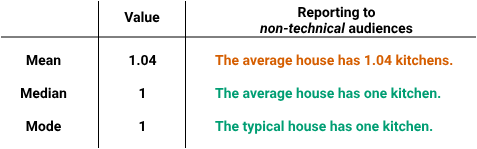

Note that the mode is also guaranteed to be a value from the distribution (this holds true for any kind of variable). This doesn't apply to the mean or the median, which can return values that are not present in the actual distribution. For instance, the mean of the Kitchen AbvGr is 1.04, but the value 1.04 is not present in the distribution.

The mean and the median generally summarize the distribution of a discrete variable much better than the mode, and you should use the mode only if you need to communicate your results to a non-technical audience.

In [34]:
houses['Bedroom AbvGr'].value_counts()


Bedroom AbvGr
3    1597
2     743
4     400
1     112
5      48
6      21
0       8
8       1
Name: count, dtype: int64

In [35]:
houses['SalePrice']

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2930, dtype: int64

## Special Cases

There are distributions that can have more than one mode. Let's say we sampled the Kitchen AbvGr column and got this distribution of eight sample points:

[
0
,
1
,
1
,
1
,
2
,
2
,
2
,
3
]

The two most frequent values are 1 and 2 (both occur in the distribution three times), which means that this distribution has two modes (1 and 2). For this reason, we call this distribution bimodal (the prefix "bi-" means "twice"). If the distribution had only one mode, we'd call it unimodal (the prefix "uni-" means "only one").

There's nothing wrong with having two modes. For our case above, the two modes tell us that the typical house on the market has either one or two kitchens.



It's not excluded to have a distribution with more than two modes. Let's say we sampled from another column, Bedroom AbvGr, and got this distribution of 10 sample points:

[
0
,
1
,
1
,
2
,
2
,
3
,
3
,
4
,
4
,
8
]

Note that this distribution has four modes: 1, 2, 3, and 4 (each occurs twice in the distribution). When a distribution has more than two modes, we say that the distribution is multimodal (the prefix "multi-" means many).

We can also have cases when there is no mode at all. Let's say we sample again from the Bedroom AbvGr column and get this distribution of 8 sample points:

[
1
,
1
,
2
,
2
,
3
,
3
,
4
,
4
]

Each unique value occurs twice in the distribution above, so there's no value (or values) that occurs more often than others. For this reason, this distribution doesn't have a mode. Contextually, we could say that there's no typical house on the market with respect to the number of bedrooms.

Distributions without a mode are often specific to continuous variables. It's quite rare to find two identical values in a continuous distribution (especially if we have decimal numbers), so the frequency of each unique value is usually 1. Even if we find identical values, their frequency is very likely to be too low to produce a meaningful mode value.

The workaround is to organize the continuous variable in a grouped frequency table, and select for the mode the midpoint of the class interval (the bin) with the highest frequency. This method has its limitations, but it generally gives reasonable answers. Let's try to get a better grasp of how this works in the following exercise.



In [36]:
intervals = pd.interval_range(start=0, end=800000, freq=100000)

houses['SalePrice'].value_counts(bins=intervals).sort_values()

(700000, 800000]       2
(600000, 700000]       4
(500000, 600000]      11
(400000, 500000]      47
(300000, 400000]     166
(0, 100000]          252
(200000, 300000]     627
(100000, 200000]    1821
Name: count, dtype: int64

In [37]:
intervals = pd.interval_range(start=0, end=800000, freq=100000)
gr_freq_table = pd.Series([0, 0, 0, 0, 0, 0, 0, 0], index=intervals)

for value in houses['SalePrice']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval] += 1
            break

mode = 150000
mean = houses['SalePrice'].mean()
median = houses['SalePrice'].median()

sentence_1 = True
sentence_2 = True
# gr_freq_table.sort_values(ascending=False).iloc[:1].index

In [38]:
mode, mean, median

(150000, 180796.0600682594, 160000.0)

## Skewed Distributions

When we plot a histogram or a kernel density plot to visualize the shape of a distribution, the mode will always be the peak of the distribution. In the code below, we plot a kernel density plot to visualize the shape of the SalePrice variable and:

- Set the limits of the x-axis using the xlim parameter — the lowest limit is the minimum value in the SalePrice variable, and the upper limit is the maximum value.
- Plot a vertical line to indicate the position of the mode (note that our estimate of 150000 from the last exercise is quite close to the peak of the distribution).

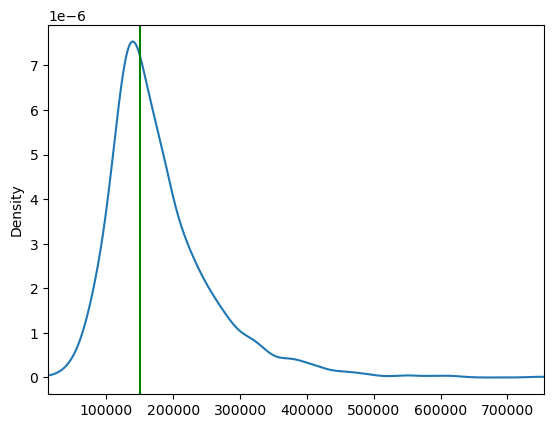

In [39]:
houses['SalePrice'].plot.kde(xlim=(houses['SalePrice'].min(),
                                  houses['SalePrice'].max()
                                 )
                         )

plt.axvline(150000, color='Green')
plt.show()

This distribution is clearly right skewed. Generally, the location of the mode, median and mean is predictable for a right-skewed distribution:

- Most values are concentrated in the left body of the distribution where they will form a peak — this is where the mode will be.
- Remember that the median divides a distribution in two halves of equal length. For this reason, the median is usually positioned slightly right from the peak (the mode) for a right-skewed distribution.
- The mean takes into account each value in the distribution, and it will be affected by the outliers in the right tail. This will generally pull the mean to the right of the median.

So in a right-skewed distribution, the mean will usually be to the right of the median, and the median will be to the right of the mode. This holds true for the distribution of the SalePrice variable:

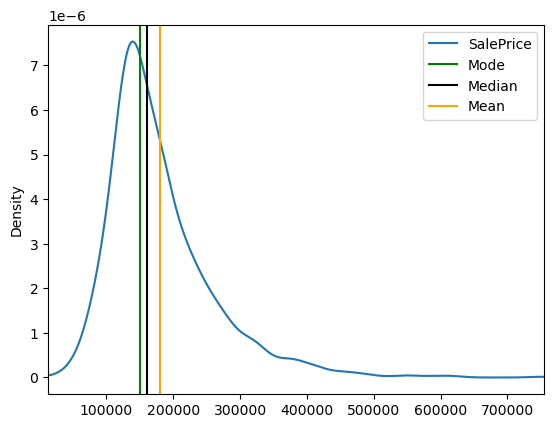

In [40]:
houses['SalePrice'].plot.kde(xlim=(houses['SalePrice'].min(),
                                     houses['SalePrice'].max())
                            )
plt.axvline(150000, color='Green', label='Mode')
plt.axvline(houses['SalePrice'].median(), color='Black', label='Median')
plt.axvline(houses['SalePrice'].mean(), color='Orange', label='Mean')
plt.legend()
plt.show()

For a left-skewed distribution, the direction is simply reversed: the mean is positioned to the left of the median, and the median to the left of the mode. This is obvious on the distribution of the Year Built variable:

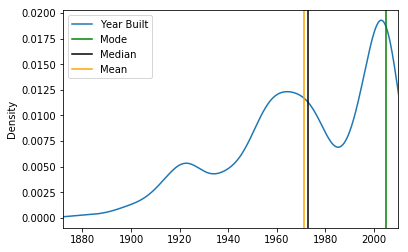

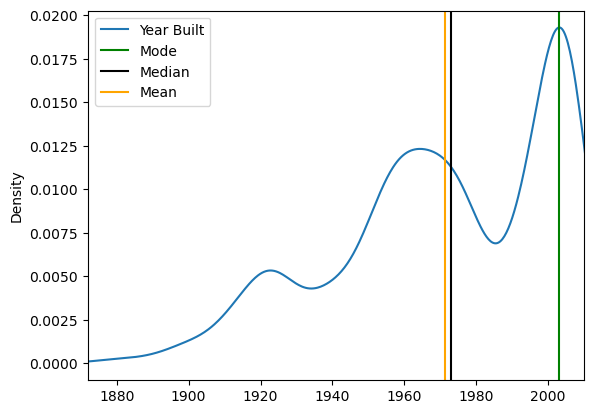

In [41]:
houses['Year Built'].plot.kde(xlim=(houses['Year Built'].min(),
                                     houses['Year Built'].max())
                            )
plt.axvline(2003, color='Green', label='Mode')
plt.axvline(houses['Year Built'].median(), color='Black', label='Median')
plt.axvline(houses['Year Built'].mean(), color='Orange', label='Mean')
plt.legend()
plt.show()

These patterns generally hold true for most skewed distributions, but Paul von Hippel showed in [a relatively recent paper](https://doi.org/10.1080/10691898.2005.11910556) that this rule of thumb has a few exceptions.

## Symmetrical Distributions

The location of the mean, median, and mode are also predictable for symmetrical distributions. Remember from the last course that if the shape of a distribution is symmetrical, then we can divide the distribution in two halves that are mirror images of one another:

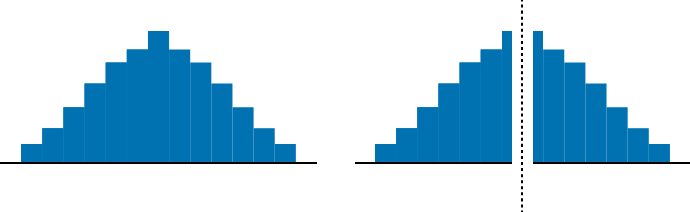

The median divides the distribution in two equal halves. As a consequence, the median will always be at the center of a perfectly symmetrical distribution because only a line drawn at the center can divide the distribution in two equal halves.

For a perfectly symmetrical distribution, the two equal halves will bear the same weight when computing the mean because the mean takes into account equally each value in the distribution. The mean is not pulled neither to the left, nor to the right, and stays instead in the center, at the same location as the median. The mean and the median are always equal for any perfectly symmetrical distribution.

Although the mean and the median have a constant location for every symmetrical distribution (no matter the shape), the location of the mode can change. The mode is where the peak is, so for a normal distribution the mode will be at the center, right where the mean and the median are.

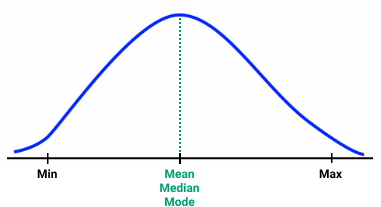

It's possible to have a symmetrical distribution with more than one peak, which means that the mode won't be at the center:

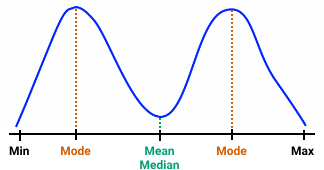

A uniform distribution doesn't have any peaks, which means it doesn't have any mode:

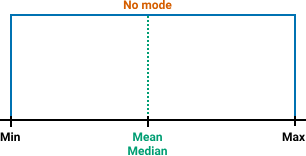

In practice, we almost never work with perfectly symmetrical distributions, but many distributions are approximately symmetrical nonetheless. This means that the patterns outlined above are still relevant for practical purposes.

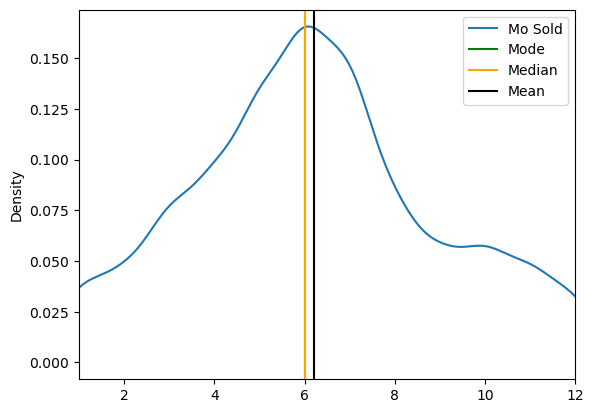

In [42]:
houses['Mo Sold'].plot.kde(xlim=(1, 12))
plt.axvline(houses['Mo Sold'].mode().loc[0], color='Green', label='Mode')
plt.axvline(houses['Mo Sold'].median(), color='Orange', label='Median')
plt.axvline(houses['Mo Sold'].mean(), color='Black', label='Mean')
plt.legend()
plt.show()

In [43]:
houses['Mo Sold'].mean()

6.216040955631399

##  Next steps

In this lesson, we learned that the mode is ideal for summarizing:

- Ordinal data represented using words.
- Nominal data.
- Discrete data (when the average value needs to be communicated to a non-technical audience).

We also saw that the position of the mean, median, and mode is generally predictable for skewed and symmetrical distributions.

Throughout the last three lessons we learned how to measure the average value of a distribution. In the table below, you can see a summary of what we learned so far.

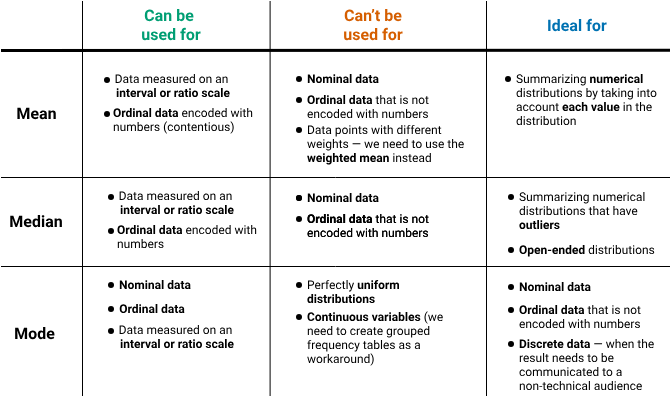

Next in this course, we'll build on what we already know and learn how to measure the variability in a distribution.

## Measures of Variability

## The Range

So far we've focused entirely on summarizing distributions using the mean, the weighted mean, the median, and the mode. An interesting distribution property we haven't yet discussed is variability. Consider, for instance, these two distributions of numerical values:

A
=
[
4
,
4
,
4
,
4
]

B
=
[
0
,
8
,
0
,
8
]

The values of the distribution 
A
 don't vary — each value is 4. The values in distribution 
B
 show some variability — they are not all identical, and the values can be either 8 or 0. If we were to quantify variability, we could assign a value of 0 to 
A
 to indicate that it has no variability. But what variability value should we assign to distribution 
B
?

We need a measure to summarize the variability of these two distributions. The summary metrics we've learned so far don't tell us anything about variability. The mean, the median, and the mode of distribution 
A
 are all 4, and distribution 
B
 has a mean and a median of 4, and no mode. If we were to judge variability based on these values, we'd probably have to conclude that the variabilities of the two distributions are equal, which is wrong.

One intuitive way to measure the variability of a distribution is to find the difference between the maximum and the minimum value. Both the maximum and the minimum of distribution 
A
 is 4, so the variability of distribution 
A
 is 0:

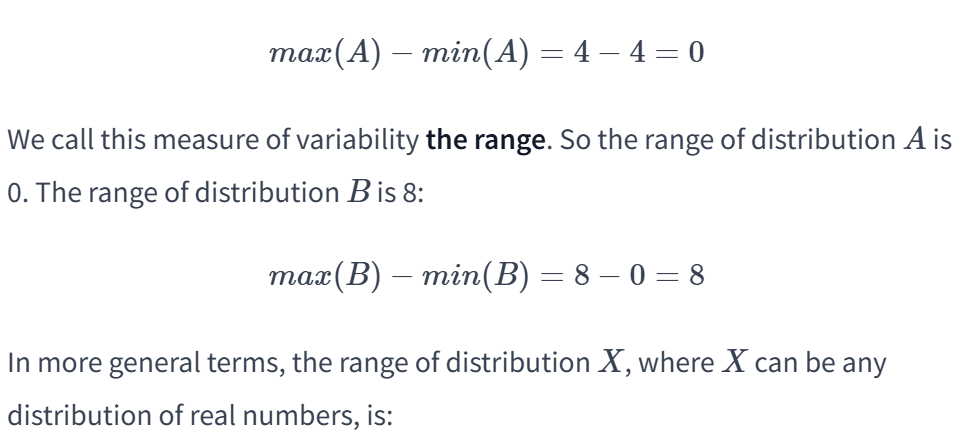

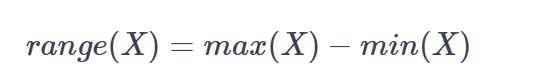

We'll continue working in this lesson with the data set on house prices we used for the last three lessons. Here's a short extract from the data set to help you recollect its structure:

In [44]:
houses.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0    131770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [45]:
def range_(arr):
    return arr.max() - arr.min()


range_by_year = houses.groupby('Yr Sold')['SalePrice'].agg(func=range_).to_dict()
range_by_year

{2006: 590000, 2007: 715700, 2008: 601900, 2009: 575100, 2010: 598868}

In [46]:
range_by_year = houses.groupby('Yr Sold')['SalePrice'].agg(func=range_).to_dict()
range_by_year

{2006: 590000, 2007: 715700, 2008: 601900, 2009: 575100, 2010: 598868}

In [47]:
max(range_by_year, key=range_by_year.get)

2007

## The Average Distance

The problem with the range is that it considers only two values in the distribution — the minimum and the maximum value. Consider this distribution 
C
:

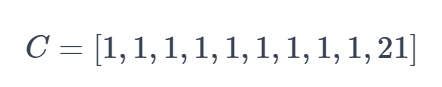

We can see there's not much variability in distribution 
C
 - we have nine values of 1, and a single value of 21. Intuitively, we'd expect the variability of distribution 
C
 to be greater than 0 because there is some variability after all, but not much greater than 0 (remember from the last screen that a distribution whose values don't vary should ideally have a variability of 0).

Despite our expectations, the range indicates that the variability of distribution 
C
 is 20.

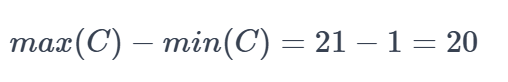

This is signficantly greater than 0 and doesn't seem like a reasonable measure of variability for distribution 
C
. The root of the problem is that the range considers only the two extreme values, and this makes it extremely sensitive to outliers. To get a more balanced measure of variability for distribution 
C
, we need to take into account each value in the distribution.

To take into account each value when measuring variability we could:

1. Take a reference value, and measure the distance of each value in the distribution from that reference value.
    - We can take the mean of the distribution as a reference value.
    - Then, we measure the distance between each value in the distribution and the mean.
  
2. Find the mean of the distances.
    - We first need to sum up all the distances.
    - Then we need to divide the total by the number of distances.

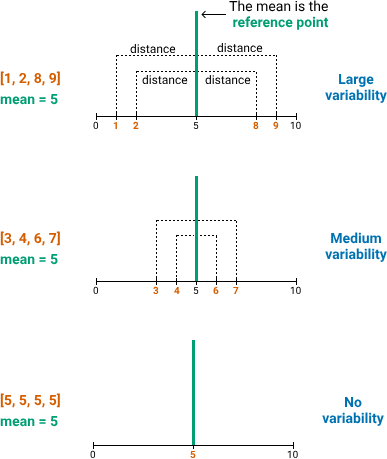

By measuring the distance of each value relative to a reference point and then taking the mean of the distances, we practically measure how much the values of a distribution vary on average with respect to that reference point.

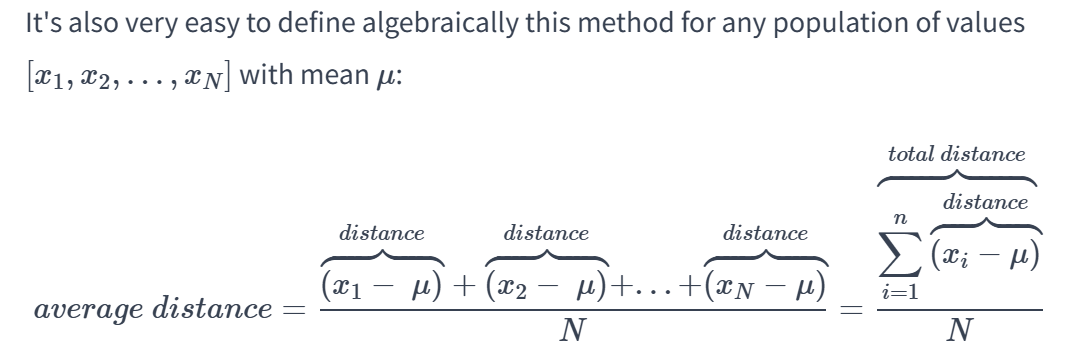

We'll continue discussing about this method in the next screen, but now let's use the formula above to measure the variability of distribution 
C
.

In [48]:
C = [1, 1, 1, 1, 1, 1, 1, 1, 1, 21]

def average_distance(array):
    avg_distance = []
    mean = sum(array) / len(array)
    
    for value in array:
        avg_distance.append(value-mean)
        
    return sum(avg_distance) / len(avg_distance)


avg_distance = average_distance(C)
print(avg_distance)

0.0


## Mean Absolute Deviation

In the last exercise the average distance was 0. This is because the mean is the balance point of the distribution and, as we've learned, the total distance of the values that are above the mean is the same as the total distance of the values below the mean. The mean 
μ
 of the distribution 
C
 is 3, so we have:

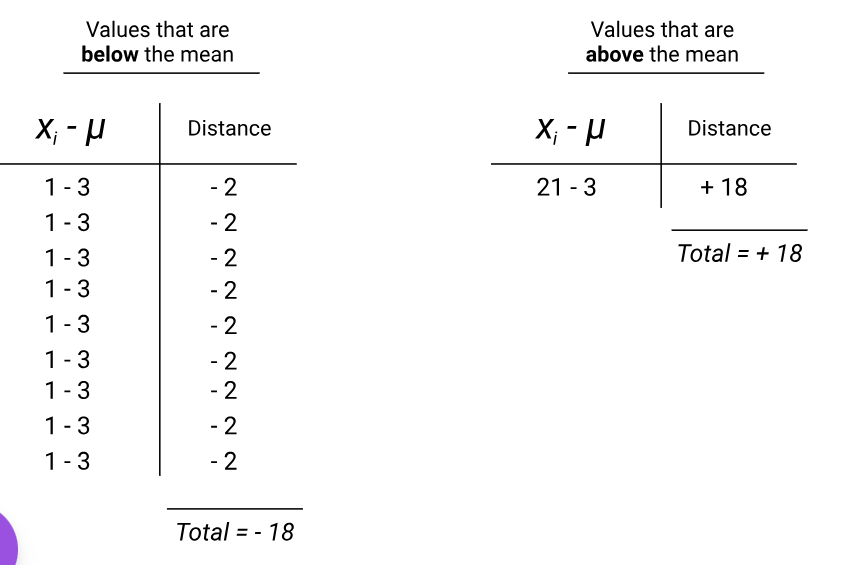

Plugging the distances into the formula we used in the previous screen will make the numerator amount to 0, which in turn will make the average distance 0:

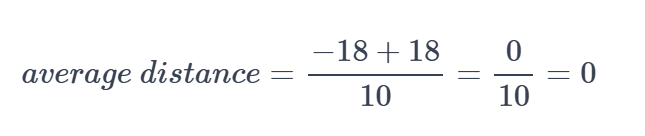

To solve this problem, we can take the absolute value of each distance, and then sum up the absolute values. The absolute value (also called modulus) of a number is the positive version of that number, regardless of its sign. For instance, the absolute value of -7 is +7, and the absolute value of +7 is +7. In mathematical notation we write:

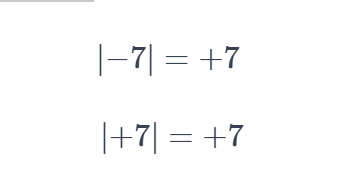

We'll update the formula used previously to reflect the fact the we're summing up the absolute distances instead:

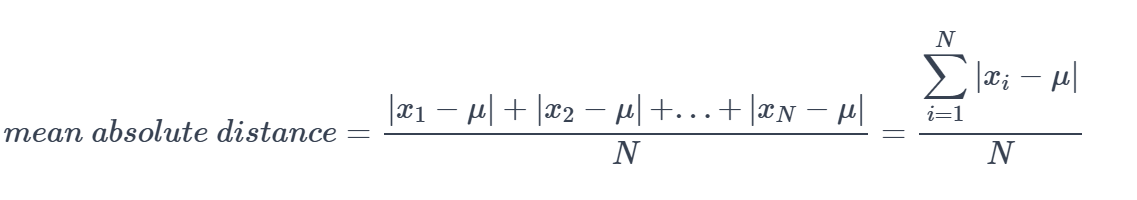

We call this measure of variability mean absolute distance. In statistical jargon, however, the distance of a value from the mean is called deviation. So the mean absolute distance is more commonly known as mean absolute deviation or average absolute deviation.

Let's take the mean absolute deviation of distribution 
C
 and see whether this metric does better than the range. Remember that the range is 20, but we expect a smaller value (which is greater than 0 at the same time).

In [49]:
C = [1, 1, 1, 1, 1, 1, 1, 1, 1, 21]

def mean_absolute_deviation(array):
    
    mean = sum(array) / len(array)
    
    distances = [abs(mean - value) for value in array]
    
    return sum(distances) / len(distances)

mad = mean_absolute_deviation(C)
print(mad)

3.6


## Variance

In the previous screen we transformed the distances to absolute values to avoid having the sum of distances amount to 0 in the numerator. Another way to solve this problem is to square each distance and then find the mean of all the squared distances:

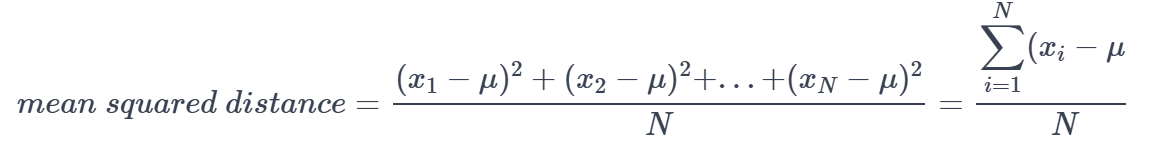

This measure of variability is sometimes called mean squared distance or mean squared deviation (remember that "distance" and "deviation" are synonymous in this context). However, it's more commonly known as variance.

Squaring the distances or taking their absolute values ensure that we get a variability value that is greater than 0 for all distributions that show some variability. Notice, however, that variance and mean absolute deviation will still be 0 for distributions that show no variability.

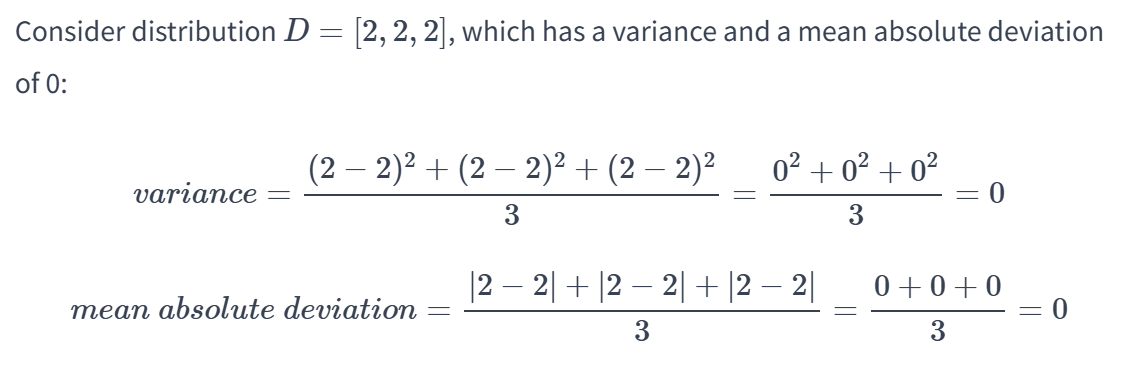

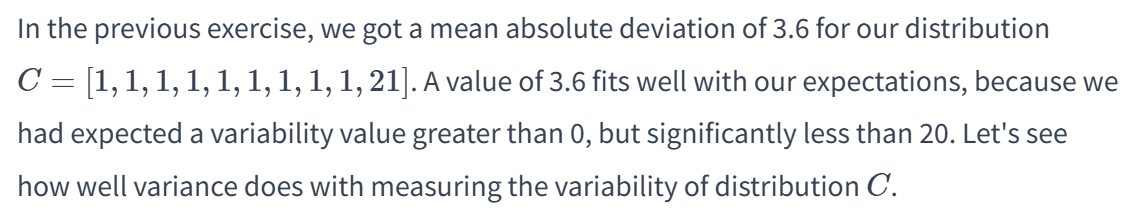

In [50]:
C = [1, 1, 1, 1, 1, 1, 1, 1, 1, 21]

def variance(array):
    mean = sum(array) / len(array)
    
    squared_distance = [(mean - value) ** 2 for value in array]
    
    return sum(squared_distance) / len(squared_distance)

variance_C = variance(C)
print(variance_C)

36.0


## Standard Deviation

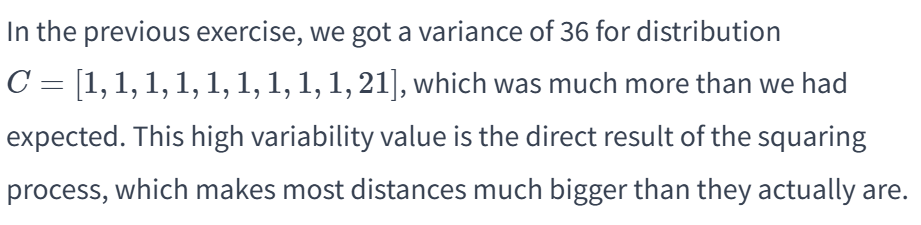

Squaring the distances also has the drawback of squaring the units of measurement. Let's consider this small sample from the Bedroom AbvGr variable (which describes the number of bedrooms in a house):

[
0
,
7
,
8
]

For computational purposes, and sometimes for simplicity, we tend to leave out the units of measurement in practice, but theoretically we should write out the units of measurement:

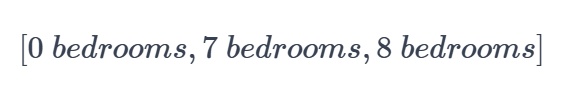

The units of measurement are subject to algebraic operations, so the variance of the sample above will be (for formatting purposes, we'll abbreviate "bedrooms" with "b"):

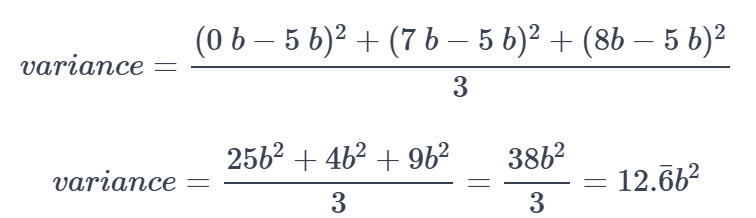

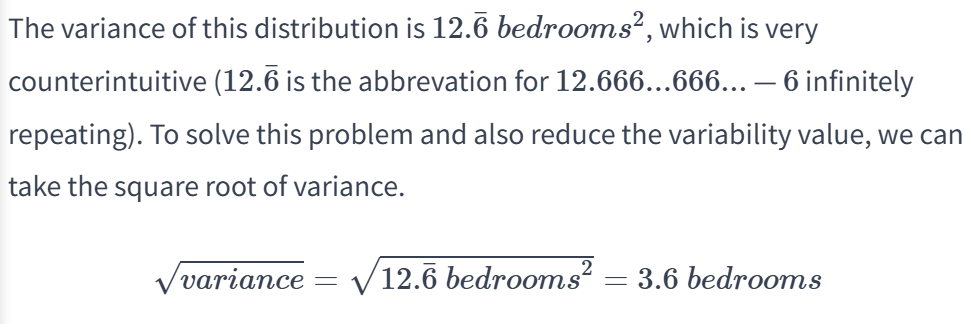

The square root of variance is called standard deviation (remember that "deviation" is synonymous with "distance"), and it can be expressed like this in an algebraic definition:

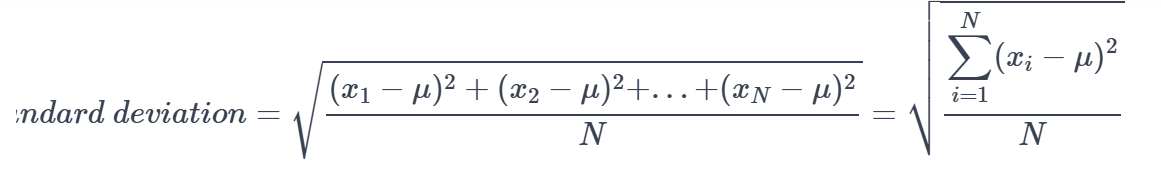

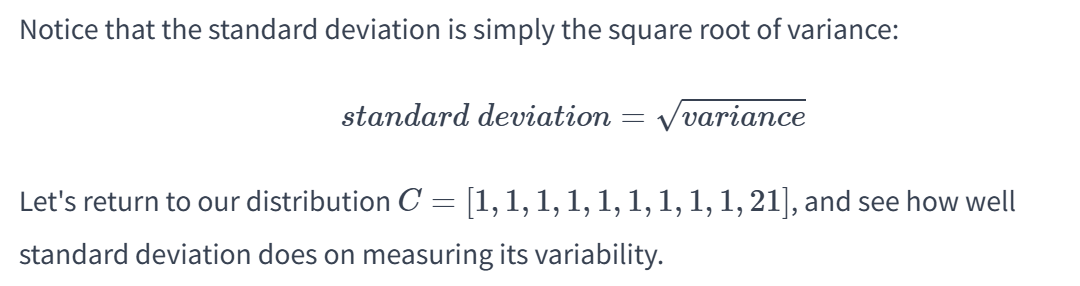

In [51]:
from math import sqrt
C = [1, 1, 1, 1, 1, 1, 1, 1, 1, 21]

C = [1, 1, 1, 1, 1, 1, 1, 1, 1, 21]

def standard_deviation(array):
    mean = sum(array) / len(array)
    
    squared_distance = [(mean - value) ** 2 for value in array]
    
    mean = sum(squared_distance) / len(squared_distance)
    
    return mean ** 0.5

standard_deviation_C = standard_deviation(C)
print(standard_deviation_C)

6.0


## Average Variability Around the Mean

In practice, standard deviation is perhaps the most used measure of variability. Let's try to get a better understanding of it by measuring the variability of the SalePrice variable in our data set. We'll use the standard_deviation() function we wrote for the previous exercise:

In [52]:
print(standard_deviation(houses['SalePrice']))

79873.05865192253


Standard deviation tells us how much the values in a distribution vary (on average) around the mean of that distribution. The mean of the SalePrice variable is approximately $180,796:

In [53]:
print(houses['SalePrice'].mean())

180796.0600682594


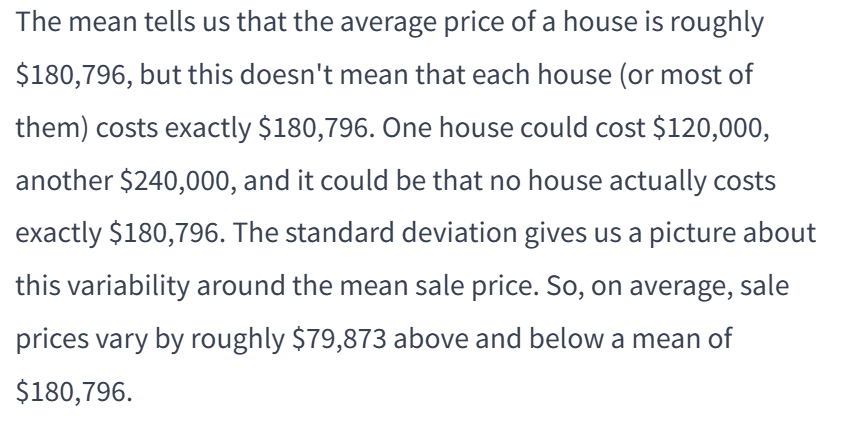

Below, we'll try to visualize this variability around the mean by:

- Generating a histogram for the distribution of the SalePrice variable.- 
Using vertical lines to mark the mean and the average deviations above and below the mean.

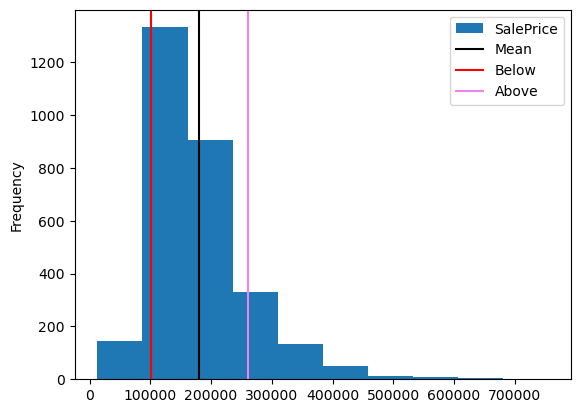

In [54]:
mean = houses['SalePrice'].mean()
st_dev = standard_deviation(houses['SalePrice'])
houses['SalePrice'].plot.hist()
plt.axvline(mean, color='Black', label='Mean')
plt.axvline(mean - st_dev, color='Red', label='Below')
plt.axvline(mean + st_dev, color='Violet', label='Above')
plt.legend()
plt.show()

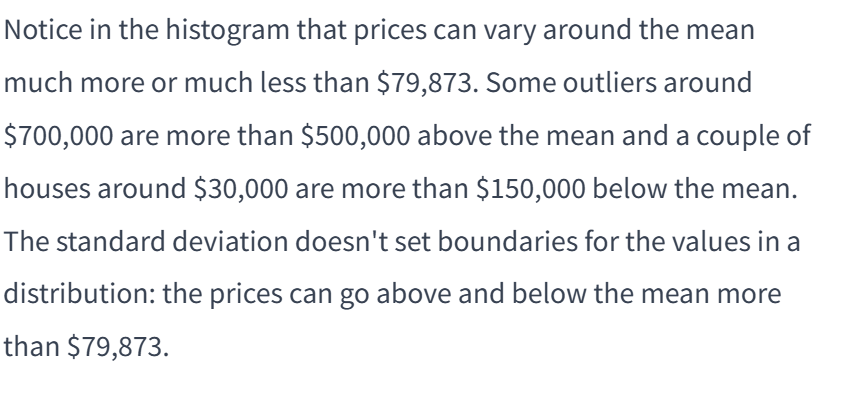

In [55]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)


greatest_variability = houses.groupby('Yr Sold')['SalePrice'].agg(func='std').sort_values(ascending=False).loc[2006]

lowest_variability = houses.groupby('Yr Sold')['SalePrice'].agg(func='std').sort_values(ascending=False).loc[2010]

In [56]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)


# Measure first the variability for each year
years = {}

for year in houses['Yr Sold'].unique():
    year_segment = houses[houses['Yr Sold'] == year]
    st_dev = standard_deviation(year_segment['SalePrice'])
    years[year] = st_dev

# Get years of max and min variability
greatest_variability = max(years, key=years.get) # outputs directly the year with the maximum variability
lowest_variability = min(years, key=years.get) # outputs directly the year with the minimum variability

## A Measure of Spread

Another way to understand standard deviation is as a measure of spread in a distribution — values in a distribution can be more or less spread. We took four random samples of 50 sample points each from the SalePrice distribution, and plotted their histograms to visualize the spread for each sample:

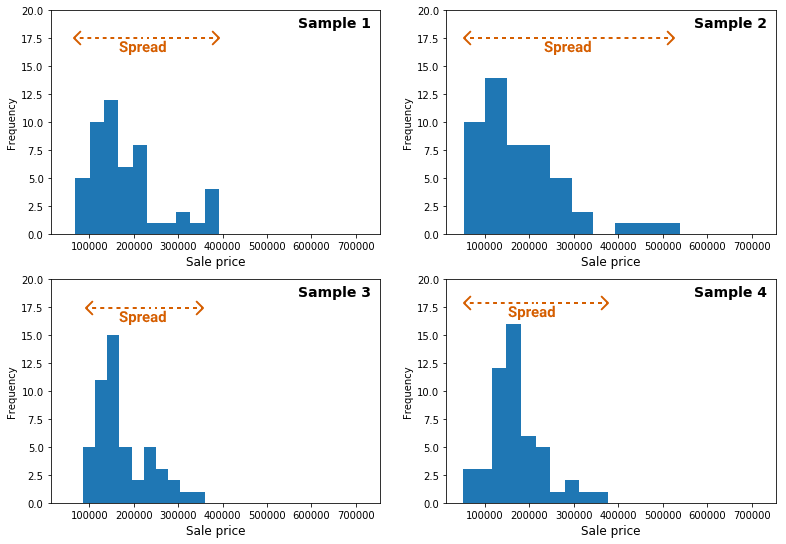

According to our visual estimates, sample 2 has the biggest spread, while the other three samples have a similar spread, with sample 3 seemingly having the lowest spread. The standard deviations of these four distributions fit our visual estimates fairly well:

In [57]:
for i in range(1,5, 1):
    sample = houses['SalePrice'].sample(50, random_state=i)
    # we used the same random states for the samples in the graph above
    st_dev = standard_deviation(sample)
    print('Sample ' + str(i) + ': ' + str(st_dev))

Sample 1: 81785.08115157679
Sample 2: 100370.62998094413
Sample 3: 60676.03851571063
Sample 4: 64436.40016450329


## The Sample Standard Deviation

In practice, we generally work with samples, but most of the time we're not actually interested in describing the samples. Rather, we want to use the samples to make inferences about their corresponding populations. Let's find out whether the standard deviation of a sample is a good estimate for the standard deviation in the corresponding population.

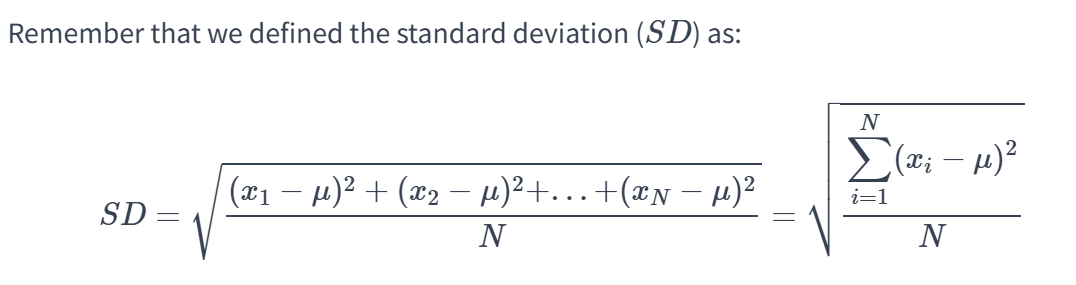

Notice in the formula that we used the population mean 
μ
, which means that if we wanted to compute the standard deviation of a sample, we'd have to know 
μ
. In practice, 
μ
 is almost never known, and we can't find it from our sample either, but we can estimate 
μ
 using the sample mean 
¯
x
.

We update slightly the formula for the sample standard deviation by changing 
μ
 to 
¯
x
 and 
N
 to 
n
 (remember that 
N
 describes the number of data points in a population, while 
n
 describes the number of data points in a sample):

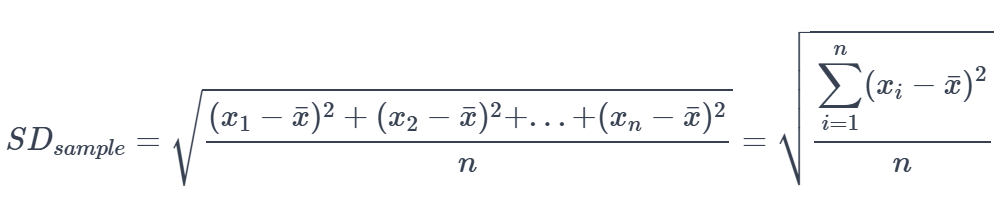

Now that we have a working formula, can we use it to reliably estimate the population standard deviation? One way we can check this is by sampling repeatedly a known population and see how the sample standard deviations compare on average to the population standard deviation.

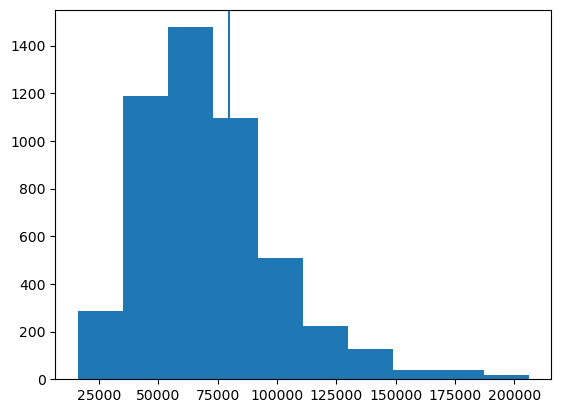

In [58]:
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)
st_devs = []
for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state=i)
    st_devs.append(standard_deviation(sample))
    
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))
plt.show()

## Bessel's Correction

In the last exercise, we plotted the histogram of 5000 sample standard deviations and compared them against the population standard deviation. Notice that most sample standard deviations are clustered below the population standard deviation:



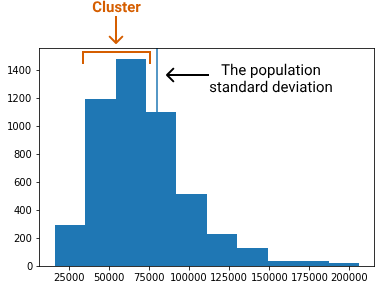

This suggests that the sample standard deviation usually underestimates the population standard deviation. We can also see that the mean of the 5000 sample standard deviations is below the population standard deviation:

In [59]:
print(sum(st_devs) / 5000) #st_devs - a list with all the 5000 st. deviations

71303.64762671606


In [60]:
print(standard_deviation(houses['SalePrice']))

79873.05865192253


So we can say that the sample standard deviation underestimates on average the population standard deviation. Some sample standard deviations are lower than the population standard deviation, some are greater, some may even be equal to the population standard deviation, but on average the sample standard deviation is lower than the population standard deviation.

We can get a good intuition for why the sample standard deviation underestimates if we think in terms of distribution spread. When we sample a population, it's generally more likely to get a sample with a spread that's lower than the population's spread. This generally translates to a lower standard deviation than in the population.

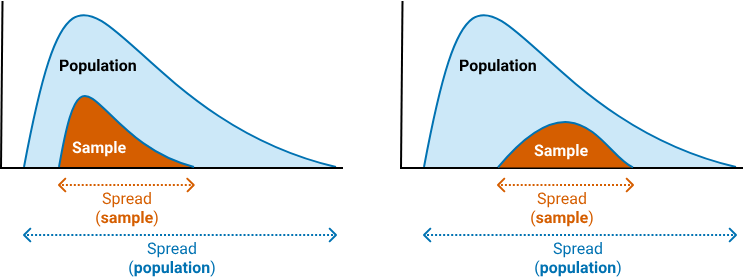

Getting a sample with a higher standard deviation than in the population is possible, but this is less likely. This is mostly specific to samples with a high spread and no clusters.

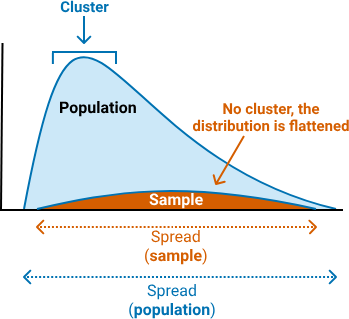

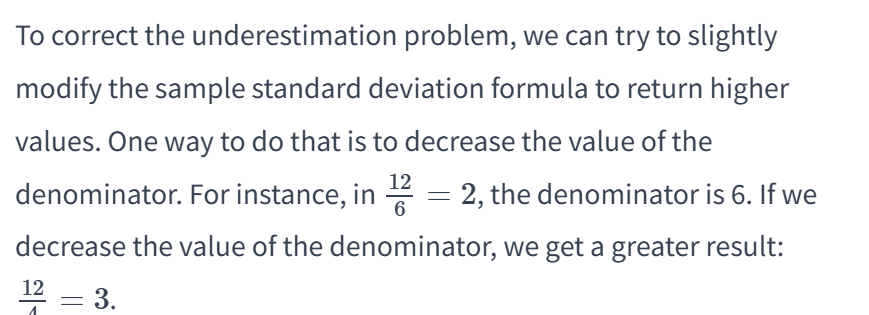

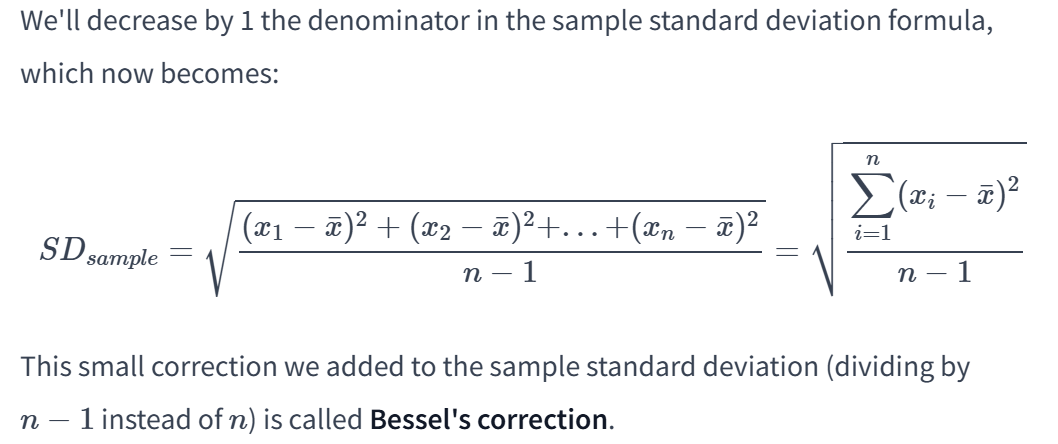

There are contexts in which we can use a number different than 
1
 or 
0
. This parameter is called delta degree's of freedom. We may encounter as function's parameters.

Let's implement Bessel's correction to our standard_deviation() function and repeat the steps in the last exercise to see if Bessel's correction adds any improvements.

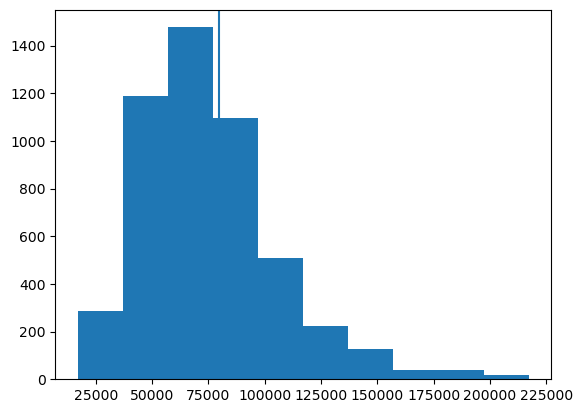

In [62]:
from math import sqrt
import matplotlib.pyplot as plt

def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / (len(distances) - 1)
    
    return sqrt(variance)

st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state=i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
pop_stdev = standard_deviation(houses['SalePrice'])
plt.hist(st_devs)
plt.axvline(pop_stdev)
plt.show()

## Standard Notation

It looks like Bessel's correction added some visible improvements and partially corrected the underestimation problem:

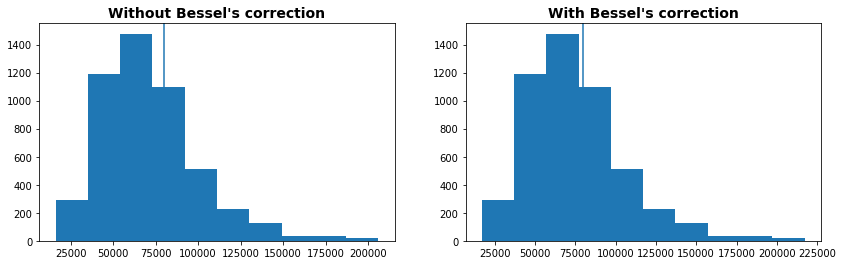

The improvement brought by Bessel's correction is more obvious when we compare the average values of the two distributions above. The mean of the 5000 sample standard deviations without Bessel's correction is roughly 71304, while the mean standard deviation of the sample standard deviations having the correction is roughly 75161. This is significantly closer to the population standard deviation, which is approximately 79873.

We could decrease the denominator more (dividing by 
n
−
2
 maybe) to try improving the correction. However, we need a single mathematical definition for the sample standard deviation, and we have to choose between 
n
, 
n
−
1
, 
n
−
2
, etc. Remember that in practice we don't know the population standard deviation, so we can't tell which correction would work best for each sample standard deviation.

Statisticians agree that 
n
−
1
 is the best choice for the sample standard deviation formula, and we'll explore a strong argument in support of this in the next screen.

Now that we know what formulas to use for samples and populations, we introduce some standard notation that will help you understand other statistics resources. The population standard deviation is denoted with the Greek letter 
σ
 (read "sigma", or "lowercase sigma"):

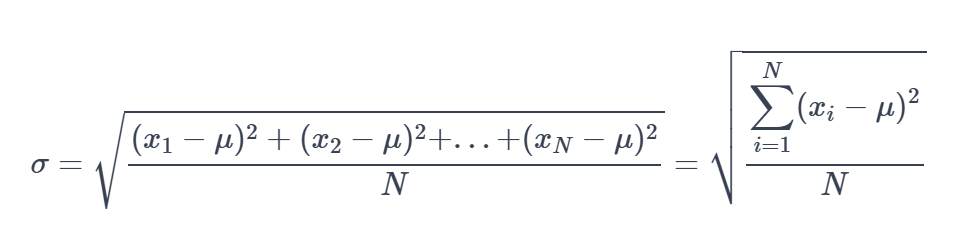

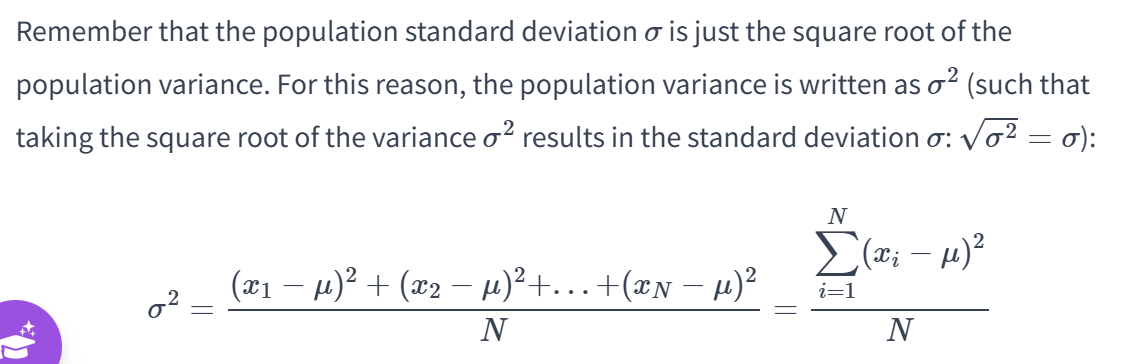

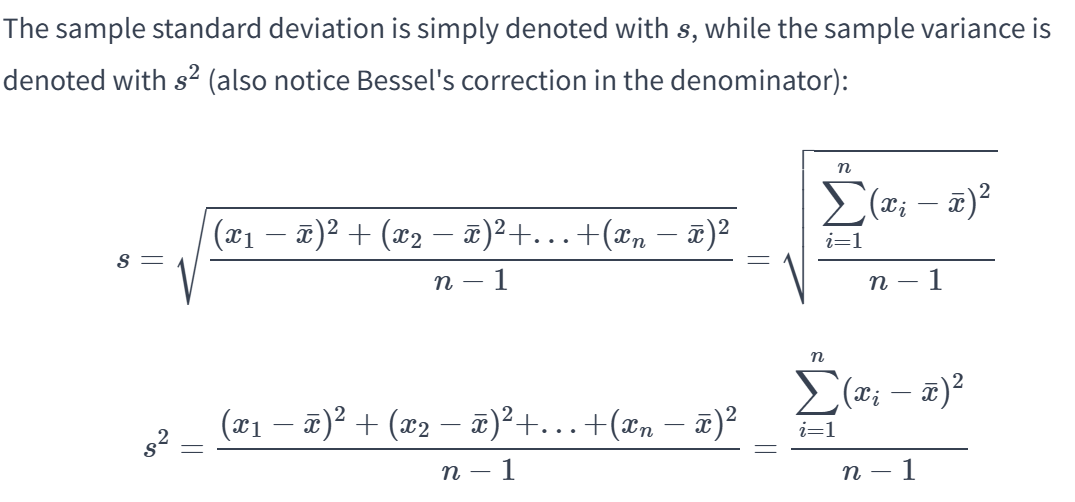

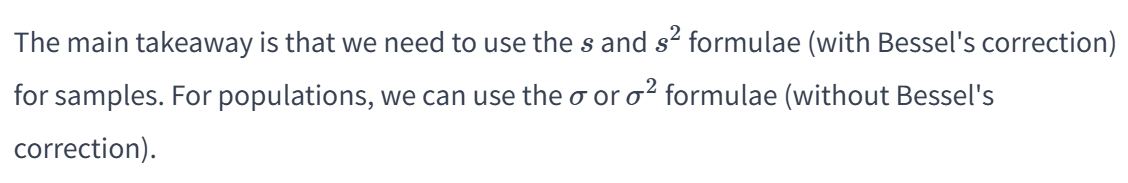

In [67]:
sample = houses.sample(100, random_state=1)
from numpy import std, var

N = sample.shape[0]
pandas_stdev = sample['SalePrice'].std(ddof=1)
numpy_stdev = std(sample['SalePrice'], ddof=1)

equal_stdevs = pandas_stdev == numpy_stdev

pandas_var = sample['SalePrice'].var(ddof=1)

numpy_var = var(sample['SalePrice'], ddof=1)
equal_vars = pandas_var == numpy_var

## Sample Variance — Unbiased Estimator

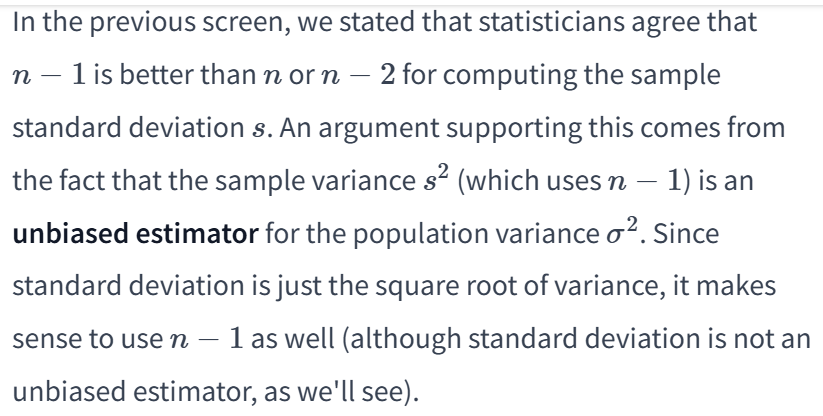

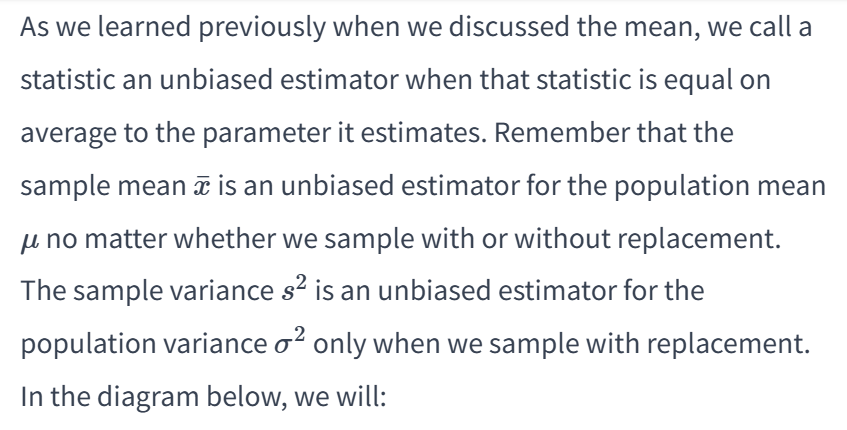

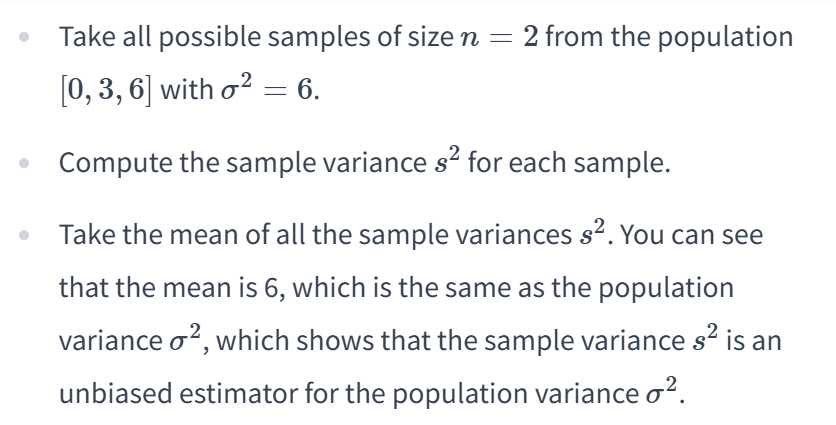

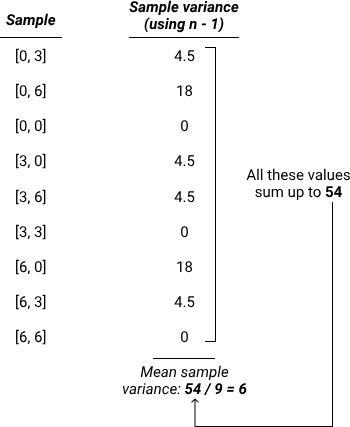

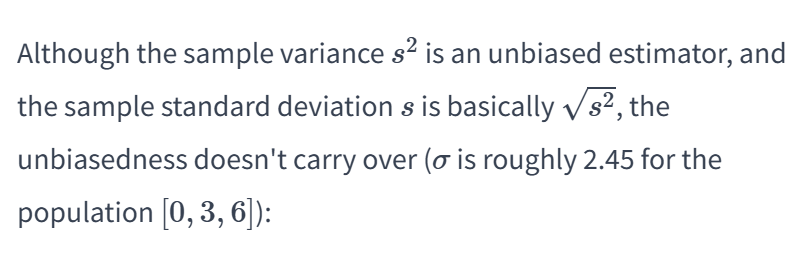

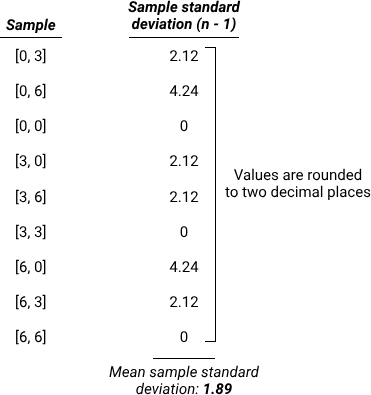

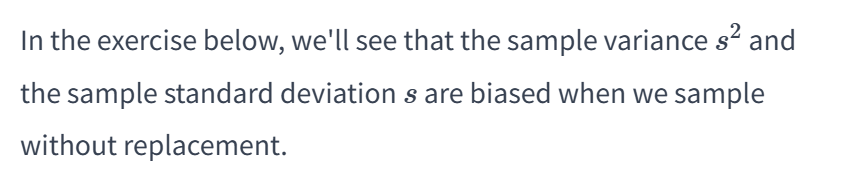

In [74]:



population = [0, 3, 6]

samples = [[0, 3], [0, 6],
           [3, 0], [3, 6],
           [6, 0], [6, 3]
          ]

def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / (len(distances) - 1)
    
    return variance ** 0.5, variance

variances = []
st_devs = []

for sample in samples:
    std, var = standard_deviation(sample)
    variances.append(var)
    st_devs.append(std)
    
mean_std = sum(st_devs) / len(st_devs)
mean_var = sum(variances) / len(variances)

pop_std, pop_var = standard_deviation(population)
equal_var = mean_var == pop_var
equal_stdev = mean_std == pop_std

In [75]:
variances 
st_devs

[2.1213203435596424,
 4.242640687119285,
 2.1213203435596424,
 2.1213203435596424,
 4.242640687119285,
 2.1213203435596424]

In [71]:
population = [0, 3, 6]

samples = [[0, 3], [0, 6],
           [3, 0], [3, 6],
           [6, 0], [6, 3]
          ]


from numpy import var, std

pop_var = var(population, ddof=0)
pop_std = std(population, ddof=0)

st_devs = []
variances = []

for sample in samples:
    st_devs.append(std(sample, ddof=1))
    variances.append(var(sample, ddof=1))
    
mean_std = sum(st_devs) / len(st_devs)
mean_var = sum(variances) / len(variances)

equal_stdev = pop_std == mean_std
equal_var = pop_var == mean_var

In [72]:
variances

[4.5, 18.0, 4.5, 4.5, 18.0, 4.5]

In [73]:
st_devs

[2.1213203435596424,
 4.242640687119285,
 2.1213203435596424,
 2.1213203435596424,
 4.242640687119285,
 2.1213203435596424]

## Next steps

In this lesson, we learned how to measure the variability of a distribution using the range, the mean absolute deviation, the variance, and the standard deviation. These metrics are ideal for measuring the variability of distributions whose values are measured on an interval or ratio scale.

Measuring variability for ordinal and nominal data is much harder because we can't quantify the differences between values. For this reason, little is written in the literature about measuring variability for ordinal and nominal data. If you want to dig more into this, you can start by reading [this paper](https://doi.org/10.1080/10691898.2007.11889465).

Next in this course, we'll build on what we know about the mean and the standard deviation and learn about z-scores.

## Z-scores

### Individual Values

Over the last four lessons, we focused on distributions as a whole and learned to summarize entire distributions and measure their variability. In this lesson, we'll switch the focus to the individual values in a distribution and learn a few statistical techniques that can help us answer practical questions.

We'll continue working with our data set on house prices:

In [76]:
houses.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0    131770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

Let's sample randomly one sale price from the SalePrice column and see what can we say about the sampled value:

In [77]:
print(houses['SalePrice'].sample(1, random_state=0))

2216    220000
Name: SalePrice, dtype: int64


We can see we got a price of $220,000. Is a house costing $220,000 cheap, expensive, or average-priced? To answer this question, we can start with finding the mean price of a house and then figure out whether $220,000 is below or above the mean:

In [78]:
print(houses['SalePrice'].mean())

180796.0600682594


The sampled house ($220,000) is clearly more expensive than the average house (roughly $180,796), but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.

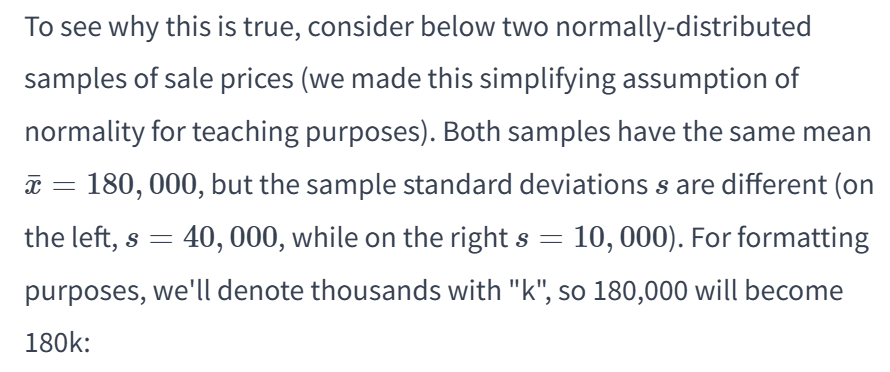

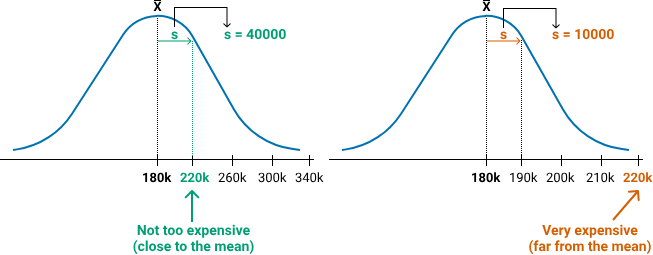

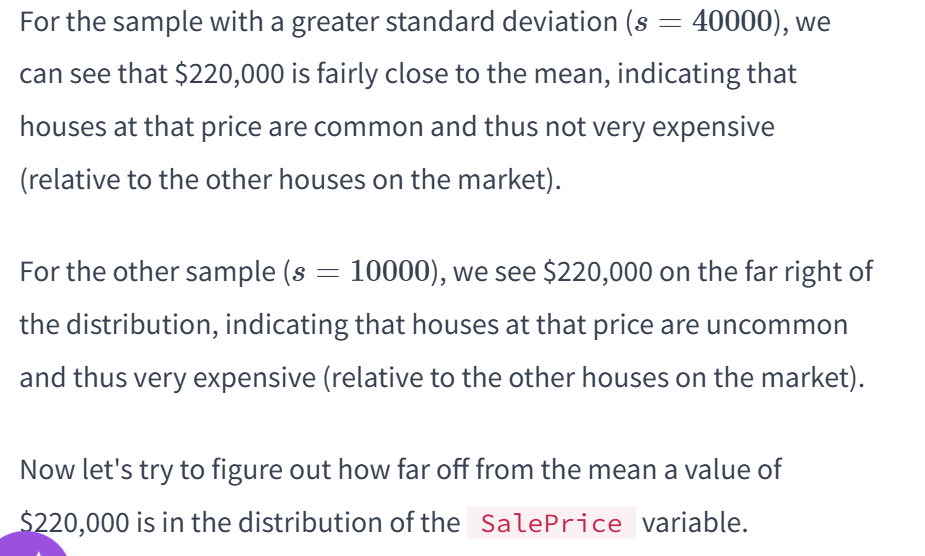

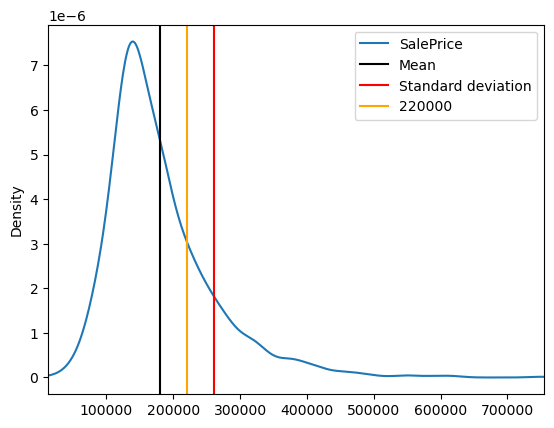

In [80]:
houses['SalePrice'].plot.kde(xlim=(houses['SalePrice'].min(), houses['SalePrice'].max()))
plt.axvline(houses['SalePrice'].mean(), color='Black', label="Mean")
plt.axvline(houses['SalePrice'].mean() + houses['SalePrice'].std(), color='Red', label='Standard deviation')
plt.axvline(220000, color='Orange', label='220000')
plt.legend()
plt.show()

very_expensive = False

## Number of Standard Deviations

Previously, we determined whether $220,000 is expensive or not by considering both the mean and the standard deviation of the distribution. We found an answer using a kernel density plot, but overall the process took more steps than it was ideal, and we also relied on a visual estimate which lacks high precision.

We need to find a faster and more precise way to measure how far off a value is from the mean (taking into account at the same time the standard deviation of the distribution). Let's take another look at the two distributions we discussed in the previous screen:

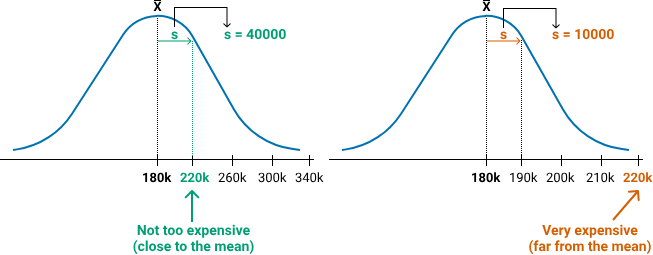


For each distribution, the distance between $220,000 and the mean $180,000 is $40,000. For the distribution on the left, this distance of $40,000 is exactly equal to its standard deviation. With this in mind, we could say that $220,000 is one standard deviation away from the mean — this is the same as saying $220,000 is $40,000 away from the mean (because "one standard deviation" is equivalent to $40,000).

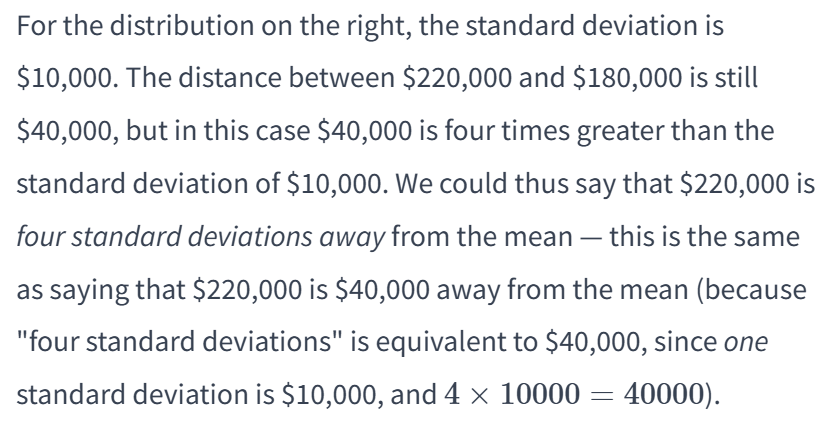

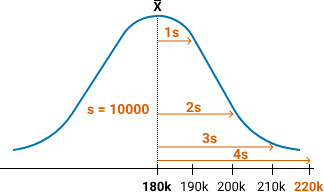


So it looks like we can measure how far off a value is from the mean in terms of number of standard deviations. If a price of $220,000 is one standard deviation away from the mean, then we can conclude that this value is relatively close to the mean, and it's not very expensive compared to the other prices in the distribution.

If a price of $220,000 is four standard deviations away from the mean, then we know that this value is very far away from the mean. This means that $220,000 is very uncommon and very expensive compared to the other prices in the distribution.

Find out the number of standard deviations away from the mean for a price of $220,000 in the distribution of the SalePrice variable.

In [81]:
st_devs_away = (220000 - houses['SalePrice'].mean()) / houses['SalePrice'].std(ddof=0)

In [83]:
st_devs_away

0.4908280788718362

##  Z-scores

In the previous exercise, we managed to find the number of standard deviations away from the mean for a value of $220,000 by:

- Finding the distance between the value and the mean (by subtracting the mean from that value).
- Dividing the distance by the standard deviation of the distribution.

Let's try to describe this process algebraically: for any value 
x
 in a population with mean 
μ
 and standard deviation 
σ
, the number of standard deviations away from the mean is given by the formula below, where we denote the number of standard deviations away from the mean with 
z
:

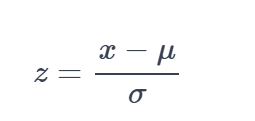

The value representing the number of standard deviations away from the mean is commonly known as the standard score, or the z-score. We'll use the term "z-score" throughout our courses.



Z-scores can also be defined fairly easy for samples. For any value 
x
 in a sample with mean 
¯
x
 and standard deviation 
s
 (with Bessel's correction), the z-score 
z
 is given by the formula:

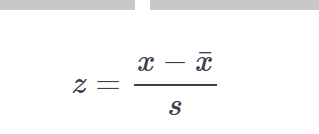

The z-scores we've dealt with so far were all positive, but we can have negative z-scores as well. Let's consider again one of the samples from the last screen (the one with a mean 
¯
x
 of $180,000, and a standard deviation 
s
 of $40,000). A price of $100,000 will have a z-score of -2:

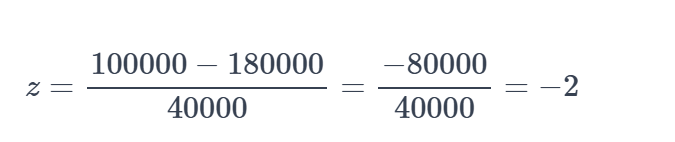

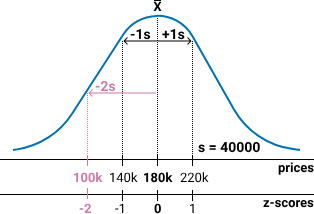

We can see that a z-score has two parts:

- The sign, which indicates whether the value is above or below the mean.- 
The value, which indicates the number of standard deviations that a value is away from the mean.


Generally, the sign of a z-score is written out even if the z-score is positive. If a value is two standard deviations away from the mean, we should write that the z-score is +2, not 2.

Write a function that takes in a value, the array the value belongs to, and returns the z-score of that value. Inside the function's definition:

In [84]:
from numpy import std

min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

def z_score(value, array, ddof=0):
    mean = sum(array) / len(array)
    z_score = (value - mean) / std(array)
    
    return z_score
min_z = z_score(min_val, houses['SalePrice'])
mean_z = z_score(mean_val, houses['SalePrice'])
max_z = z_score(max_val, houses['SalePrice'])
    

In [85]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max() 


def z_score(value, array, bessel=0):
    mean = np.mean(array)
    
    st_dev = np.std(array, ddof=bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z

min_z = z_score(min_val, houses['SalePrice'])
mean_z = z_score(mean_val, houses['SalePrice'])
max_z = z_score(max_val, houses['SalePrice'])

## Locating Values in Different Distributions

Let's now consider an example that's suggestive for the kind of questions we can answer using z-scores.

Let's say we're working as data analysts for a real estate company, and we want to find the best neighborhood in Ames to invest in (remember that our data set describes sale prices for houses in Ames, Iowa). Our company wants to buy a couple of houses that we can then rent and ideally sell back later at a higher price. We think that location is an important factor driving rental and sale prices, and we want to target our investment based on location.

The company budgeted $10,000,000 for this investment, and the plan is to buy 50 houses of $200,000 each. Depending on the market particularities of each neighborhood, a $200,000 house can be considered cheap, average-priced, or expensive. We want to find a neighborhood where a price of $200,000 goes as average because average-priced houses are the ones that are most rented and easiest to sell.

Sale prices are lower in bad neighborhoods and someone can get a high-quality house for $200,000, but usually people avoid bad neighborhoods for a variety of reasons: distance from the workplace, lack of schools, pollution, noise, etc.

High-quality neighborhoods will tend to be avoided as well because of the higher sale prices — with $200,000, you may only be able to get a poor-quality house in a good location. So most people will aim for something in the middle — these people make up the market we intend to reach.

We're asked by our real estate specialists to analyze historical data on five neighborhoods:

- North Ames.
- College Creek.
- Old Town.
- Edwards.
- Somerset.

Our goal is to find out for which of these neighborhoods a $200,000 house is average-priced. We can solve this task quickly by measuring the z-score for a $200,000 value for each of the five distributions — each of the five neighborhoods has its own distribution of sale prices with its own mean and standard deviation.

We saw in the previous exercise that the mean of a distribution has a z-score of 0, so our recommendation should be the neighborhood with the z-score closest to 0 (we'll detail later in this lesson why the mean of a distribution has a z-score of 0).

Note that we can't simply find the mean sale price of each neighborhood and then just subtract $200,000 from the mean to find the neighborhood with the lowest difference. This way we'd fail to take into account the variability of each distribution.

In [86]:
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z

neighborhoods = ['NAmes', 'CollgCr','OldTown','Edwards','Somerst']
z_by_location = {}
for neighborhood in neighborhoods:
    sample = houses[houses['Neighborhood'] == neighborhood]
    z_by_location[neighborhood] = z_score(200000, sample['SalePrice'])
best_investment = 'College Creek'

## Transforming Distributions

Z-scores are often used to transform entire distributions by converting all the values to z-scores. Consider, for instance, the distribution of the SalePrice column:

<Axes: ylabel='Density'>

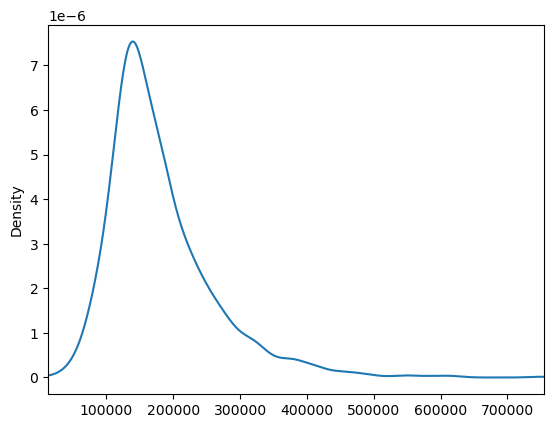

In [95]:
houses['SalePrice'].plot.kde(xlim=(houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                   )
                           )

We can transform the entire distribution by converting each value to a z-score. In the next code block, we will:

- Convert each value to a z-score by using the Series.apply() method.
- Store the z-scores in a separate column named z_prices.
- Plot side by side the kernel density plot for the original values and the kernel density plot for the z-scores.

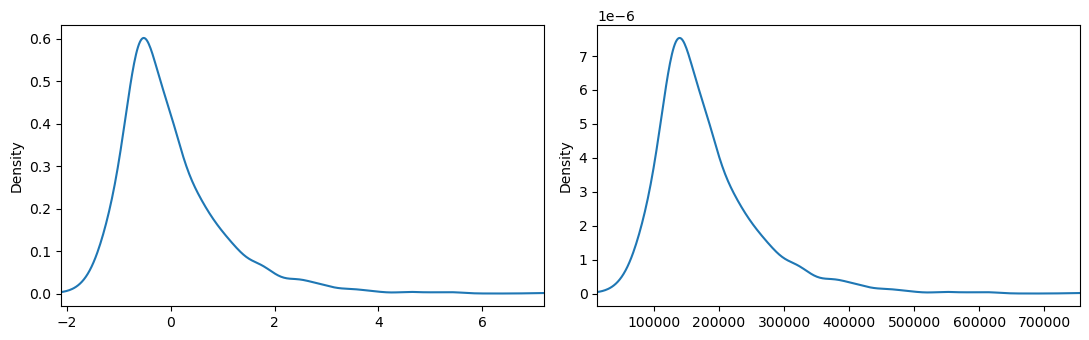

In [96]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof=0)

houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )

plt.figure(figsize=(11, 3.5))
plt.subplot(1, 2, 1)
houses['z_prices'].plot.kde(xlim=(houses['z_prices'].min(),
                                houses['z_prices'].max()
                                )
                        )
plt.subplot(1, 2, 2)
houses['SalePrice'].plot.kde(xlim=(houses['SalePrice'].min(),
                                    houses['SalePrice'].max()
                                    )
                            )
plt.tight_layout() # otherwise the plots will overlay partially
plt.show()

Notice that the shape of the initial distribution is preserved perfectly in the new distribution of z-scores. We'll dig more into why this happens in the next screen. For now, let's find out what happens to the mean and the standard deviation when we convert all the values to z-scores.

In [97]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof=0)
houses['z_prices'] = houses['SalePrice'].apply(
    lambda x: ((x - mean) / st_dev)
    )


z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof=0)

# Transforming 'Lot Area'
mean_area = houses['Lot Area'].mean()
stdev_area = houses['Lot Area'].std(ddof=0)
houses['z_area'] = houses['Lot Area'].apply(
    lambda x: ((x - mean_area) / stdev_area)
    )

z_mean_area = houses['z_area'].mean()
z_stdev_area = houses['z_area'].std(ddof=0)

## The Standard Distribution

In the last exercise, the mean values were both extremely close to 0. For instance, we got a mean of -1.1429992333726227e-16 (notice the e-16 at the end) for the z-scores distribution of the SalePrice column. This number uses [scientific notation](https://en.wikipedia.org/wiki/Scientific_notation#E-notation) to abbreviate what in full would be -0.0000000000000001429992333726227. Also, both the standard deviations were also very close to 1: 1.0000000000000002 and 0.9999999999999997.

In fact, for every distribution of z-scores, the mean is always 0 and the standard deviation is always 1. We got slightly different values in the previous exercise because of small rounding errors. Let's now figure out why the mean is always 0 and standard deviation is always 1.

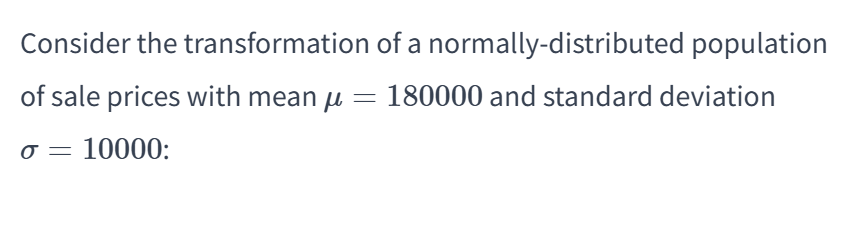

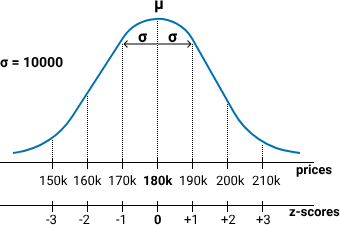

Notice that when we transform to z-scores, the initial values are practically relabeled and the relative location of each value in the distribution is perfectly preserved. This explains why the shape of the original distribution is preserved, and it also means that the location of the mean and the standard deviation is preserved as well.

The mean is located at 180000 in the initial distribution. In the z-score distribution, the mean has the same location, but now there's a value of 0 at that location because the z-score of 180000 is 0.

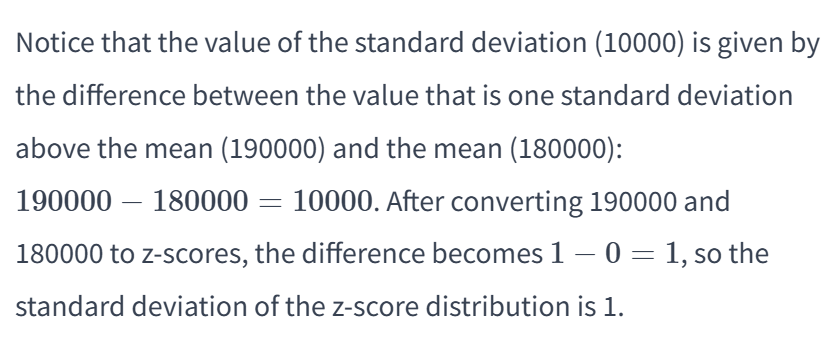

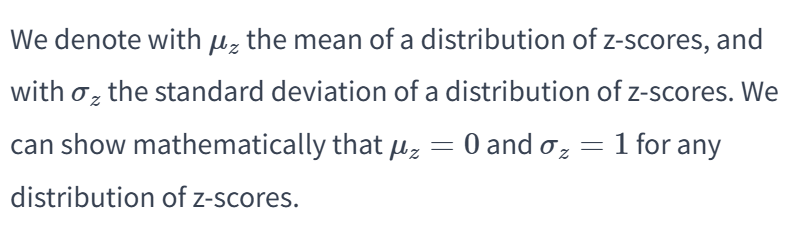

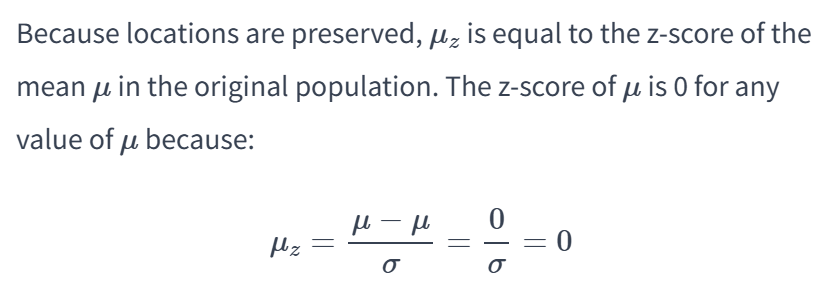

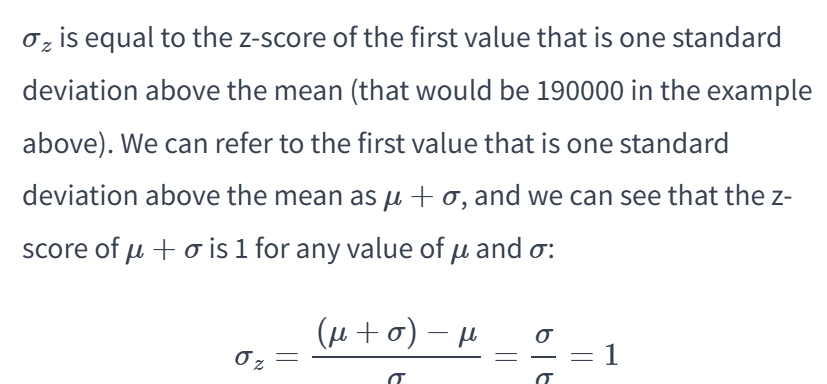

A distribution of z-scores is often called a standard distribution (remember that z-scores are also called standard scores). When we convert a distribution to z-scores, we'd say in statistical jargon that we standardized the distribution.

In [98]:
import numpy as np

population = [0, 8, 0, 8]


mean_pop = np.mean(population)
stdev_pop = np.std(population, ddof=0)

standardized_pop = []
for value in population:
    z = (value - mean_pop) / stdev_pop
    standardized_pop.append(z)
    
mean_z = np.mean(standardized_pop)
stdev_z = np.std(standardized_pop, ddof=0)

## Standardizing Samples

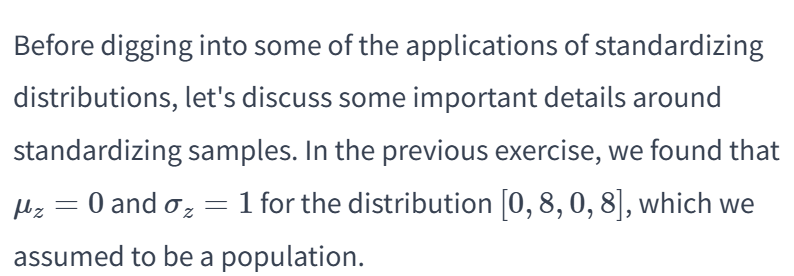

Let's instead treat it as a sample and proceed to standardize it. Because it's a sample, we'll use the formula for the sample standard deviation 
s
 (the formula containing Bessel's correction):

In [99]:
import numpy as np

sample = [0, 8, 0, 8]
x_bar = np.mean(sample)
s = np.std(sample, ddof=1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)

print(standardized_sample)

[-0.8660254037844387, 0.8660254037844387, -0.8660254037844387, 0.8660254037844387]


In [101]:
np.mean(standardized_sample)

0.0

In [103]:
np.std(standardized_sample)

0.8660254037844387

Above, we measured the standard deviation using the formula for the population standard deviation 
σ
 (the formula without Bessel's correction). But is it justified to use the formula for the population standard deviation?

When we standardize a sample, the resulting distribution of z-scores is itself a sample. This means that we need to use the formula for the sample standard deviation 
s
 when we compute the standard deviation. Let's see if that makes the standard deviation equal to 1, just like we'd expect.

In [104]:
from numpy import std, mean
sample = [0,8,0,8]

x_bar = mean(sample)
s = std(sample, ddof = 1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)
    
stdev_sample = std(standardized_sample, ddof=1)

## Using Standardization for Comparisons

Standardizing distributions can prove very useful when we need to compare values coming from different systems of measurement. Let's say there are two companies in Ames which offer services in evaluating overall house quality. Inspectors from each company examine houses and rate them with an index score which describes the overall quality of the house.

The inspection itself is quite expensive, and a house owner generally asks the service from only one company. The problem is that each company has its own system of measuring overall quality, which results in index scores that are impossible to compare. We've coded under the hood some index scores and saved them in the columns index_1 and index_2:

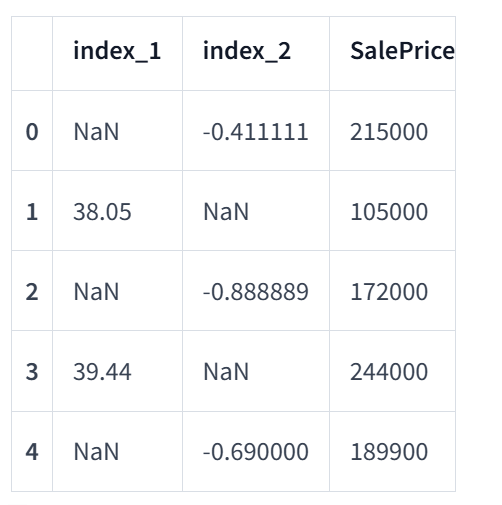

Let's suppose for a moment that these houses are not yet sold, and a client needs our help to choose between the first and the second house (from the table above). We want to begin with comparing index scores, but the first house has an index of -0.41111, the second's index is 38.05000, and the two indices come from different measurement systems, which makes them impossible to compare.

One thing the two systems have in common is that the index is directly proportional with the house quality — a lower index means lower quality, and a higher index means higher quality. To compare these indices coming from different measurement systems, we can:

- Standardize each distribution of index values (transform each index to a z-score).
- Then compare the z-scores.

Average houses will have z-scores around 0 in both distributions, good-quality houses will have z-scores significantly greater than 0, and low-quality houses will have z-scores significantly lower than 0.

For the sake of the example, we're also under the strong assumption that both companies evaluate houses of all levels of quality. If a company evaluates only low-quality houses, then the best of the low quality houses will have a z-score significantly greater than 0, suggesting erroneously that they are high-quality.

In [106]:
# mean_index1 = houses['index_1'].mean()
# stdev_index1 = houses['index_1'].std(ddof=0)
# houses['z_1'] = houses['index_1'].apply(lambda x: 
#                                       (x - mean_index1) / stdev_index1
#                                      )

# mean_index2 = houses['index_2'].mean()
# stdev_index2 = houses['index_2'].std(ddof=0)
# houses['z_2'] = houses['index_2'].apply(lambda x: 
#                                       (x - mean_index2) / stdev_index2
#                                      )

# print(houses[['z_1', 'z_2']].head(2))
# better = 'first'

## Converting Back from Z-scores

Previously, we standardized the index_1 and index_2 distributions and managed to solve our comparison task. Z-scores may not be always straightforward to work with or communicate to non-technical audiences, but fortunately we can convert them to other values that are more intuitive.

Remember that the formula for finding a z-score in a population is:

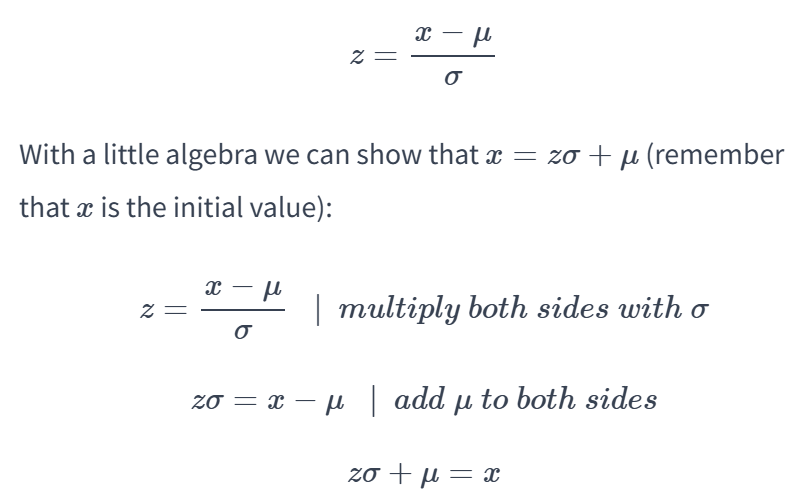

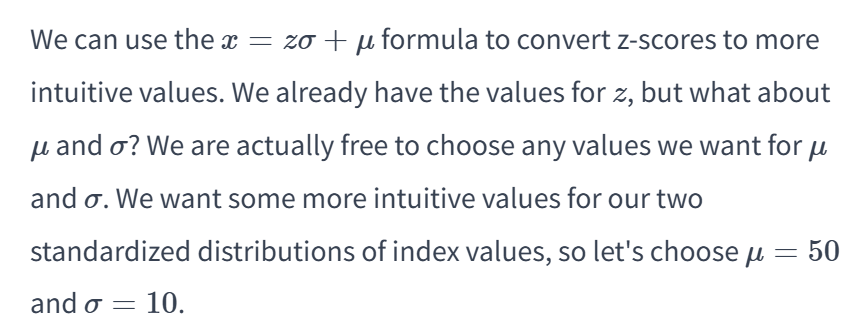

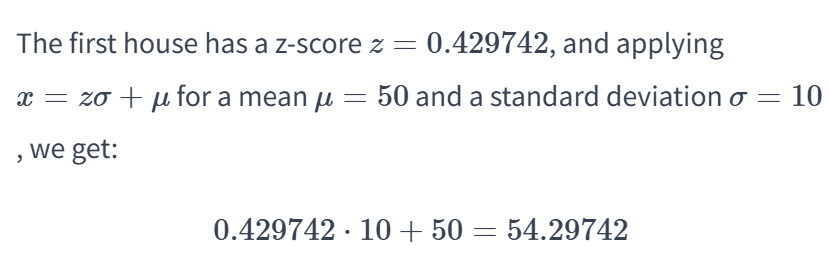

Each z-score in the distribution will follow the same procedure — it'll be multiplied by 10 and then we'll add 50 to the result of the product. This means that the location of each z-score will be preserved perfectly — it's all a matter of relabeling. To make this transformation, notice that we took several steps:

1. We standardized an initial distribution with a given 
μ
 and 
σ
 (we performed this step in the previous exercise when we standardized the distribution of index_1 and index_2).
2. We converted the standardized distribution to values that together have a different mean 
μ
 and standard deviation 
σ
 than they did initially.

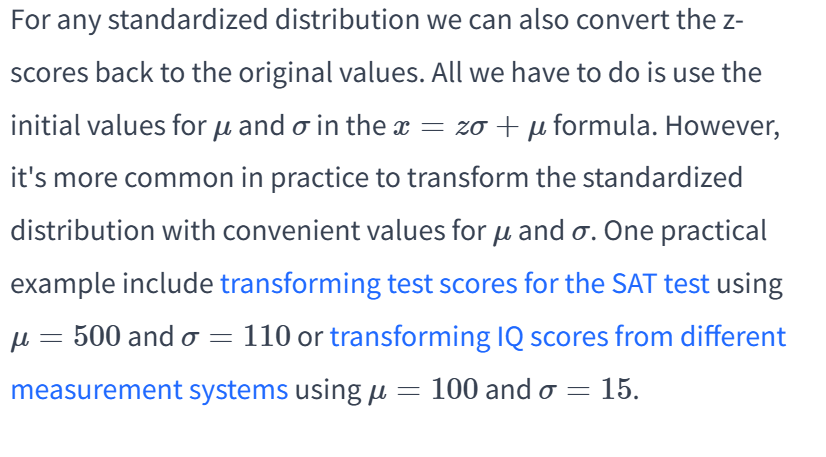

Notice that above we discussed only about populations, but the same reasoning applies to samples.

In [107]:
# mean = 50
# st_dev = 10
# houses['transformed'] = houses['z_merged'].apply(
#                                 lambda z: (z * st_dev + mean)
#                                 )
# mean_transformed = houses['transformed'].mean()
# stdev_transformed = houses['transformed'].std(ddof=0)

## Next steps
In this lesson, we learned to use z-scores to describe the location of a value within a distribution. We found that z-scores are useful for comparing values coming from different distributions with different means and standard deviations.

We also learned to standardize distributions and discussed a few situations where that might be useful. It's worth mentioning that standardization is also useful for some machine learning algorithms that we'll learn about in later courses. Also, z-scores in general are key elements in understanding confidence intervals and hypothesis testing, which we'll discuss in later courses.

We've made great progress so far in this course and learned how to summarize distributions, measure their variability, and describe the location of individual values using z-scores. Next in this course, we'll work together on a project to apply what we've learned.